<a href="https://colab.research.google.com/github/mitwnkl/coffee_classification/blob/main/coffee_classification_eng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coursework

Theme: Origin of a coffee bean

Task type: classification

author: Aleinikov O.V.

In this notebook, I will try to classify the country of origin of coffee beans based on the characteristics of the drink from experts.

Dataset: https://www.kaggle.com/datasets/ankurchavda/coffee-beans-reviews-by-coffee-quality-institute?select=Coffee-modified.csv

In [1]:
# data processing and visualization packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/mitwnkl/coffee_classification/main/coffee_beans.csv"
df = pd.read_csv(url, index_col="ID")
df.head()

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
ID,,,,,,,,,,,,,,,,,,,,,
1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,0.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,1.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,...,NaN,0.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,...,Green,2.0,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,2.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1319 entries, 1 to 1312
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Species                1319 non-null   object 
 1   Owner                  1310 non-null   object 
 2   Country.of.Origin      1316 non-null   object 
 3   Farm.Name              961 non-null    object 
 4   Lot.Number             276 non-null    object 
 5   Mill                   1007 non-null   object 
 6   ICO.Number             1169 non-null   object 
 7   Company                1105 non-null   object 
 8   Altitude               1092 non-null   object 
 9   Region                 1257 non-null   object 
 10  Producer               1084 non-null   object 
 11  Number.of.Bags         1314 non-null   object 
 12  Bag.Weight             1314 non-null   object 
 13  In.Country.Partner     1314 non-null   object 
 14  Harvest.Year           1266 non-null   object 
 15  Grading.D

## Cleaning data + EDA

The dataset is small, but has a large number of attributes, most of which are not needed at all.

As the task is to determine the country of origin of coffee beans target variable is obviously `Country.of.Origin`

It remains to select the predictor variables by which the model will determine the country. These variables should be directly related to the grain and coffee as a drink from this grain, and not related to geographical factors such as the location of the farm, the height of the farm, or the suppliers

Guided by logic, I chose `Aroma`, `Flavor`, `Aftertaste`, `Acidity`, `Sweetness`, `Body`, `Moisture`

* `Aroma` - aroma saturation (from 1.0 to 10.0)
* `Flavor` - flavor saturation (from 1.0 to 10.0)
* `Aftertaste` - saturation of the aftertaste (rating from 1.0 to 10.0)
* `Acidity` - measure of acidity (rating from 1.0 to 10.0)
* `Sweetness` - measure of sweetness (rating from 1.0 to 10.0)
* `Body` - grain size (mm)
* `Moisture` - grain moisture (% expressed from 0.0 to 1.0)

All others can be deleted

In [4]:
target = "Country.of.Origin"
predictors = ["Aroma", "Flavor", "Aftertaste", "Acidity", "Sweetness", "Body", "Moisture"]

df = df[predictors + [target]]
df.head()

,Aroma,Flavor,Aftertaste,Acidity,Sweetness,Body,Moisture,Country.of.Origin
ID,,,,,,,,
1,8.67,8.83,8.67,8.75,10.0,8.50,0.12,Ethiopia
2,8.75,8.67,8.5,8.58,10.0,8.42,0.12,Ethiopia
3,8.42,8.5,8.42,8.42,10.0,8.33,0,Guatemala
4,8.17,8.58,8.42,8.42,10.0,8.50,0.11,Ethiopia
5,8.25,8.5,8.25,8.5,10.0,8.42,0.12,Ethiopia


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1319 entries, 1 to 1312
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Aroma              1311 non-null   object 
 1   Flavor             1309 non-null   object 
 2   Aftertaste         1309 non-null   object 
 3   Acidity            1309 non-null   object 
 4   Sweetness          1308 non-null   float64
 5   Body               1309 non-null   float64
 6   Moisture           1308 non-null   object 
 7   Country.of.Origin  1316 non-null   object 
dtypes: float64(2), object(6)
memory usage: 92.7+ KB


In [6]:
# There are 1319 records, but with indexes from 1 to 1312, they are not very important, but I better update them
df = df.reset_index(drop=True)
df.head()

,Aroma,Flavor,Aftertaste,Acidity,Sweetness,Body,Moisture,Country.of.Origin
0,8.67,8.83,8.67,8.75,10.0,8.50,0.12,Ethiopia
1,8.75,8.67,8.5,8.58,10.0,8.42,0.12,Ethiopia
2,8.42,8.5,8.42,8.42,10.0,8.33,0,Guatemala
3,8.17,8.58,8.42,8.42,10.0,8.50,0.11,Ethiopia
4,8.25,8.5,8.25,8.5,10.0,8.42,0.12,Ethiopia


Since this is a supervised learning task, firstly I need to check the missing values of the target variable, if there are any, because without them it will not be possible to create a model

In [7]:
df[df[target].isna()]

,Aroma,Flavor,Aftertaste,Acidity,Sweetness,Body,Moisture,Country.of.Origin
1087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1088,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1204,6.75,6.75,6.42,6.83,10.0,7.58,0.1,NaN


There are 3 missing values, 2 of which are completely missing, I will delete them, but one of them has all the target variables saved, I can try to restore the country of origin based on these values

**For example, by sorting all the values by the target variables and filling the missing value with the bfill / ffill method (The idea is that when the values are sorted, then next to the row with the missing values there will be a row with the most similar data to the one in which the country is omitted, from where you can take country name)**

In [8]:
# removing full empty rows
df = df.drop([1087, 1088])

# filling a value
df[target] = df.sort_values(predictors)[target].fillna(method="ffill")
print(df.loc[1204], "\n") # check changes

df[df[target].isna()]

Aroma                 6.75
Flavor                6.75
Aftertaste            6.42
Acidity               6.83
Sweetness             10.0
Body                  7.58
Moisture               0.1
Country.of.Origin    Haiti
Name: 1204, dtype: object 



,Aroma,Flavor,Aftertaste,Acidity,Sweetness,Body,Moisture,Country.of.Origin


Now its time to see if all the target values are countries or maybe there are surprises here

In [9]:
df[target].unique()

array(['Ethiopia', 'Guatemala', 'Brazil', 'Peru', 'United States',
       'United States (Hawaii)', 'Indonesia', 'China', 'Costa Rica',
       'Mexico', 'Uganda', 'Honduras', 'Taiwan', 'Nicaragua',
       'Tanzania, United Republic Of', 'Kenya', 'Thailand', 'Colombia',
       'Panama', 'Papua New Guinea', 'El Salvador', 'Japan', 'Ecuador',
       'United States (Puerto Rico)', 'Haiti', 'Burundi', 'Vietnam',
       'Philippines', 'Rwanda', 'Malawi', 'Laos', 'Zambia', 'Myanmar',
       '7.42', 'Natural / Dry',
       '0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660', 'Mauritius', '7.25',
       'm', 'Cote d?Ivoire', 'India', 'oriente'], dtype=object)

There are several unclear entries in the sign in which no specific country is written ("oriente" - "east" in Spanish, most likely refers to the countries of the Central East).
Since this is a target feature and the task I am solving is a task with the teacher, without having the name of the country, everything else does not make sense, so in my opinion these lines should be deleted

In [10]:
df[df["Country.of.Origin"].isin(["7.42", "Natural / Dry", "0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660", "7.25", "m", "oriente"])]

,Aroma,Flavor,Aftertaste,Acidity,Sweetness,Body,Moisture,Country.of.Origin
920,Specialty Coffee Association,d3ed2a8c1db69c87daef88f425dd0e8ef3216a39,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,NaN,900.00,NaN,7.42
963,"November 15th, 2018",NaN,NaN,NaN,NaN,NaN,NaN,Natural / Dry
964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660
1089,Blossom Valley International,NaN,NaN,NaN,NaN,NaN,NaN,7.25
1090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,m
1292,10,10,6.42,74.75,10.0,0.11,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,oriente


These records turned out to be terrible, no useful information, at first glance line 1292 seems to be normal, but oriente indicates a whole list of countries, and this line also has an outlier in the Acidity column and a missing Moisture, this can be removed

In [11]:
df = df[~df["Country.of.Origin"].isin(["7.42", "Natural / Dry", "0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660", "7.25", "m", "oriente"])]

# cosmetic change
df = df.replace({"Country.of.Origin":{"Tanzania, United Republic Of": "Tanzania",
                                      "Cote d?Ivoire": "Cote d`Ivoire",
                                      "United States (Hawaii)": "Hawaii",
                                      "United States (Puerto Rico)": "Puerto Rico"}})

df["Country.of.Origin"].unique()

array(['Ethiopia', 'Guatemala', 'Brazil', 'Peru', 'United States',
       'Hawaii', 'Indonesia', 'China', 'Costa Rica', 'Mexico', 'Uganda',
       'Honduras', 'Taiwan', 'Nicaragua', 'Tanzania', 'Kenya', 'Thailand',
       'Colombia', 'Panama', 'Papua New Guinea', 'El Salvador', 'Japan',
       'Ecuador', 'Puerto Rico', 'Haiti', 'Burundi', 'Vietnam',
       'Philippines', 'Rwanda', 'Malawi', 'Laos', 'Zambia', 'Myanmar',
       'Mauritius', 'Cote d`Ivoire', 'India'], dtype=object)

The target variable has been sorted out, now the predictor variables, as it was shown earlier, the data types do not match, it is obvious that all variables must be of the float type, but some of them are for some reason object, we need to see why this is so, correct the errors and then change their type to float

In [12]:
for pred in predictors:
    print(pred, df[pred].unique())

Aroma ['8.67' '8.75' '8.42' '8.17' '8.25' '8.58' '8.08' '8.33' '8' '8.5' '7.83'
 '7.92' '7.67' '7.75' '7.58' '7.5' '7.42' '7.81' '7.33' '7.25' '7.17'
 '7.08' '5.08' '7' '6.92' nan '6.83' '6.75' '6.67' '6.42' '6.17' '6.5'
 '6.33' '0']
Flavor ['8.83' '8.67' '8.5' '8.58' '8.42' '8.33' '8.25' '8.17' '8.08' '8' '7.83'
 '7.75' '7.92' '7.58' '7.67' '7.81' '7.5' '7.88' '7.42' '7.25' '7.33' '7'
 '7.08' '7.17' nan '6.92' '6.67' '6.83' '6.5' '6.75' '6.08' '6.17' '6.33'
 '6.58' '6.42' '0']
Aftertaste ['8.67' '8.5' '8.42' '8.25' '8.33' '8.58' '8.17' '8.08' '7.83' '8' '7.92'
 '7.75' '7.67' '7.58' '7.42' '7.5' '7.88' '7.33' '7.56' '7.25' '7.17' '7'
 '7.38' '7.08' '6.83' '6.92' nan '6.75' '6.33' '6.42' '6.58' '6.67' '6.5'
 '6.17' '6.25' '0']
Acidity ['8.75' '8.58' '8.42' '8.5' '8.33' '8.25' '8.17' '7.75' '8' '8.08' '7.92'
 '7.83' '7.67' '7.58' '7.42' '7.17' '7.5' '7.25' '7.33' '7.08' '7.63'
 '6.75' '7' '6.92' nan '5.25' '6.83' '6.67' '6.08' '6.5' '6.25' '0']
Sweetness [10.    9.33  8.67  6.67   nan  8

It seems that all text data is deleted during cleaning, you can change the type and continue cleaning data

In [13]:
df[predictors] = df[predictors].astype("float64")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1311 entries, 0 to 1318
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Aroma              1307 non-null   float64
 1   Flavor             1307 non-null   float64
 2   Aftertaste         1307 non-null   float64
 3   Acidity            1307 non-null   float64
 4   Sweetness          1307 non-null   float64
 5   Body               1307 non-null   float64
 6   Moisture           1307 non-null   float64
 7   Country.of.Origin  1311 non-null   object 
dtypes: float64(7), object(1)
memory usage: 92.2+ KB


### Predictor variables distribution

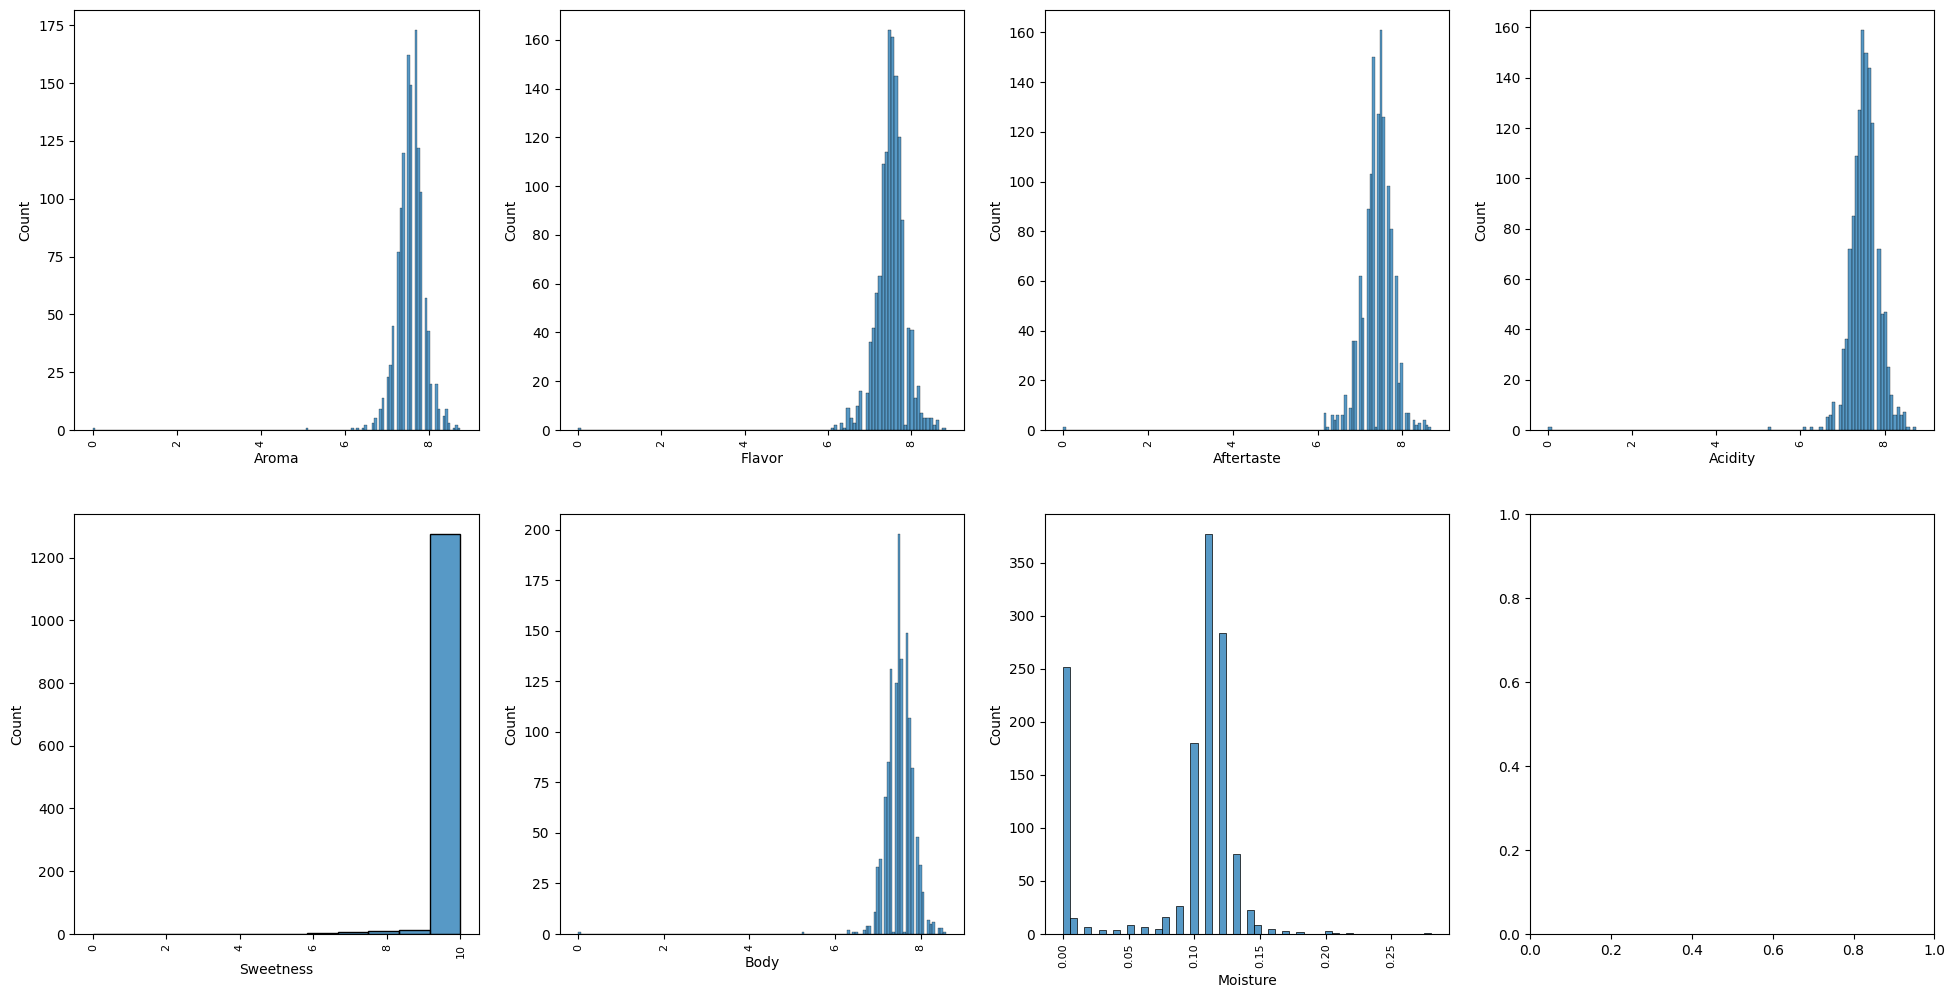

In [14]:
def plot_predictors_distribution(df, predictors):
    fig, ax = plt.subplots(2, 4, figsize=(24, 12))
    for pred, axes in zip(predictors, ax.flatten()[:-1]):
        sns.histplot(data=df,
                     x=pred,
                     ax=axes)
        axes.tick_params(axis="x",
                        labelrotation=90,
                        labelsize=8)
    plt.show()

plot_predictors_distribution(df, predictors)

The graphs show that almost all variables have a normal distribution.

However, the `Sweetness` variable is left-skewed, and almost all of its values lie in the 9 to 10 interval.

And the `Moisture` variable, even though it has a distribution very similar to the normal one, has a very large number of zeros, which may indicate that a large part of the grain has already been dried and fried, so it does not have moisture or another reason for dryness.

You can also see that in all variables except `Moisture` the values are in the range from 6 to 10, so anything less than 6 can be removed as an outlier

In [15]:
print(f"Number of observation before removal: {df.shape[0]}")
# every variable exept `Moisture`
for pred in predictors[:-1]:
    df = df[df[pred] >= 6]

print(f"Number of observation after removal: {df.shape[0]}")

Number of observation before removal: 1311
Number of observation after removal: 1302


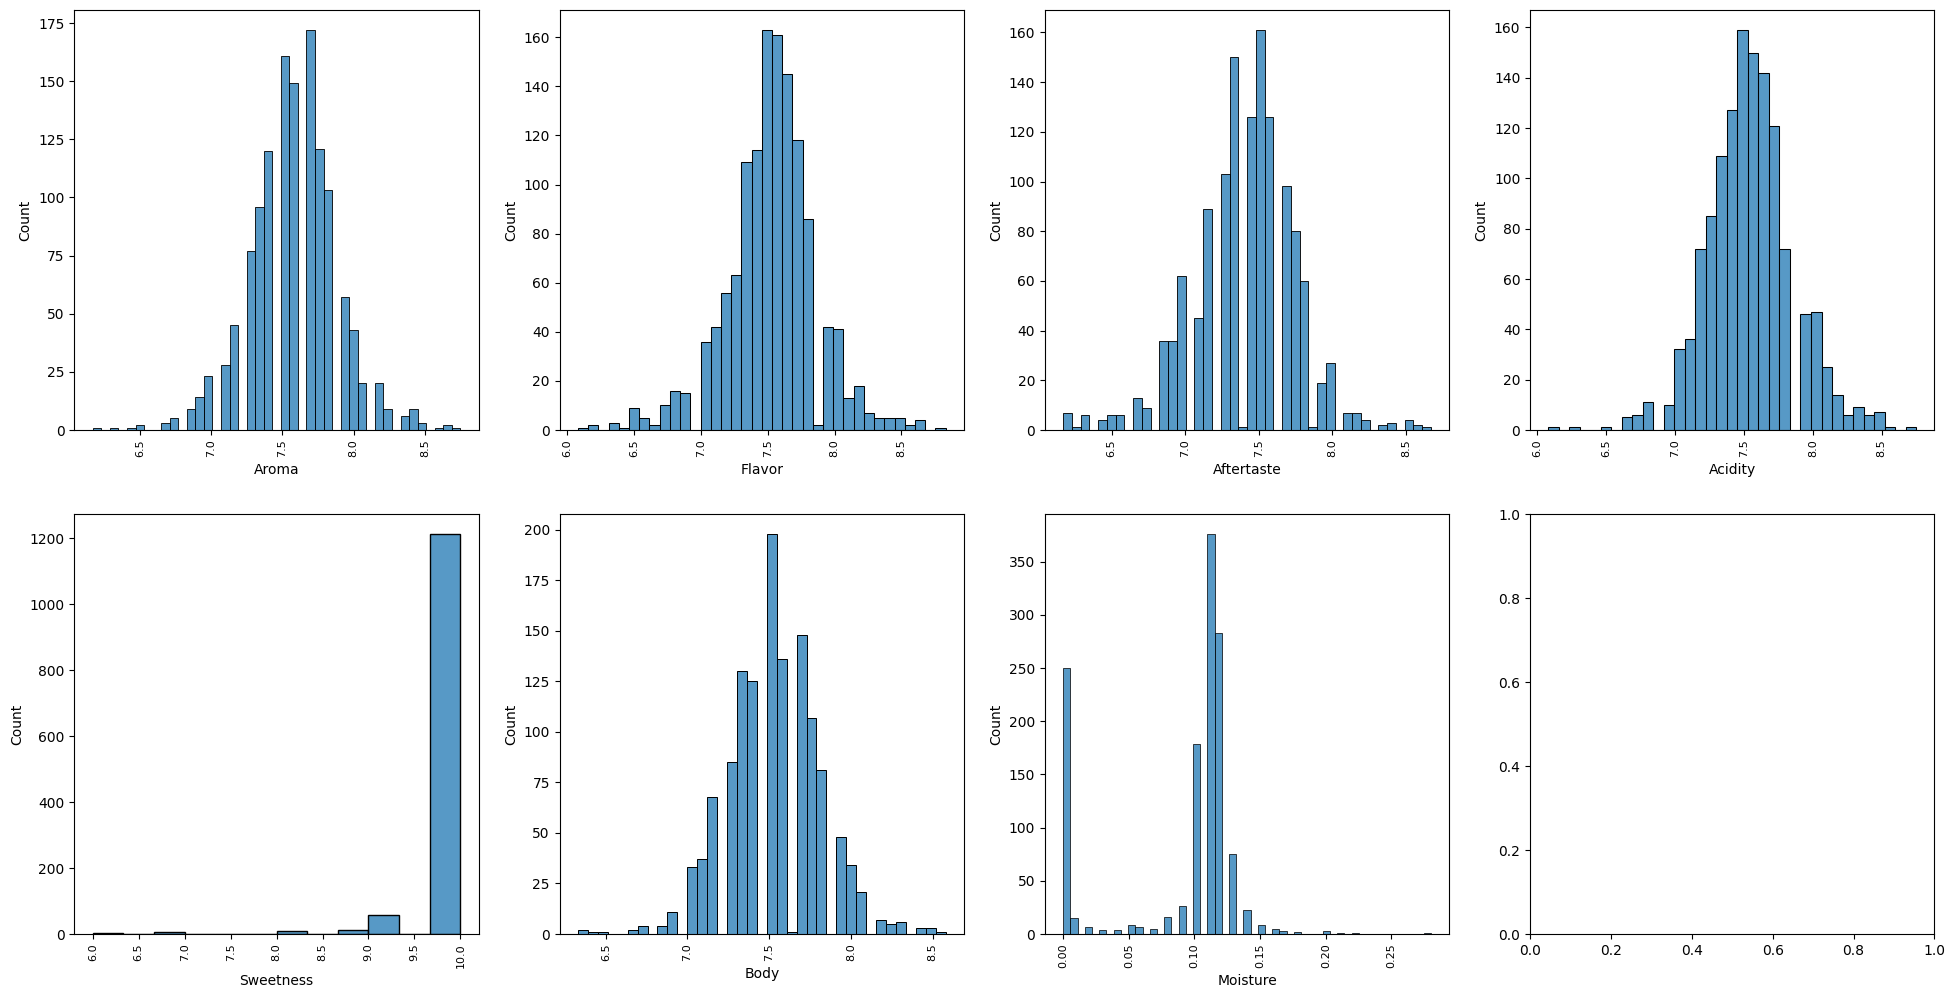

In [16]:
# new distributions
plot_predictors_distribution(df, predictors)

There are still many gaps in the distributions, it is necessary to show these values for each variable

In [17]:
# Function for distribution as a series
def get_numerical_distribution(df, var, lower_bound=6.5, upper_bound=8.5):
    return df[(df[var] >= lower_bound) & (df[var] <= upper_bound)][var].value_counts().sort_index()

In [18]:
print(get_numerical_distribution(df, "Aroma"))

6.50      2
6.67      3
6.75      5
6.83      9
6.92     14
7.00     23
7.08     28
7.17     45
7.25     77
7.33     96
7.42    120
7.50    161
7.58    149
7.67    172
7.75    121
7.81      2
7.83    101
7.92     57
8.00     43
8.08     20
8.17     20
8.25      9
8.33      6
8.42      9
8.50      3
Name: Aroma, dtype: int64


From the numerical distribution, you can see that the value 7.81 is problematic, it should be deleted

In [19]:
df = df[df["Aroma"] != 7.81]

In [20]:
print(get_numerical_distribution(df, "Flavor", 6.8, 8))

6.83     16
6.92     15
7.00     36
7.08     42
7.17     56
7.25     63
7.33    109
7.42    114
7.50    163
7.58    161
7.67    145
7.75    118
7.83     85
7.88      1
7.92     42
8.00     41
Name: Flavor, dtype: int64


In [21]:
df = df[df["Flavor"] != 7.88]

In [22]:
print(get_numerical_distribution(df, "Aftertaste"))

6.50      6
6.58      6
6.67     13
6.75      9
6.83     36
6.92     36
7.00     62
7.08     45
7.17     89
7.25    103
7.33    150
7.42    126
7.50    161
7.58    125
7.67     98
7.75     80
7.83     60
7.92     19
8.00     27
8.08      7
8.17      7
8.25      4
8.33      2
8.42      3
8.50      4
Name: Aftertaste, dtype: int64


There are no problematic values in the `Aftertaste`

In [23]:
print(get_numerical_distribution(df, "Acidity", upper_bound=8))

6.50      1
6.67      5
6.75      6
6.83     11
6.92     10
7.00     32
7.08     36
7.17     72
7.25     85
7.33    109
7.42    127
7.50    159
7.58    150
7.67    141
7.75    119
7.83     72
7.92     46
8.00     47
Name: Acidity, dtype: int64


in `Acidity` too

In [24]:
print(get_numerical_distribution(df, "Body"))

6.50      1
6.67      2
6.75      4
6.83      4
6.92     11
7.00     33
7.08     37
7.17     68
7.25     85
7.33    130
7.42    124
7.50    197
7.58    136
7.67    148
7.75    107
7.83     81
7.92     48
8.00     34
8.08     21
8.17      7
8.25      5
8.33      6
8.42      3
8.50      3
Name: Body, dtype: int64


Also in grain form. You can build new distribution graphs and see if the gaps have disappeared or not

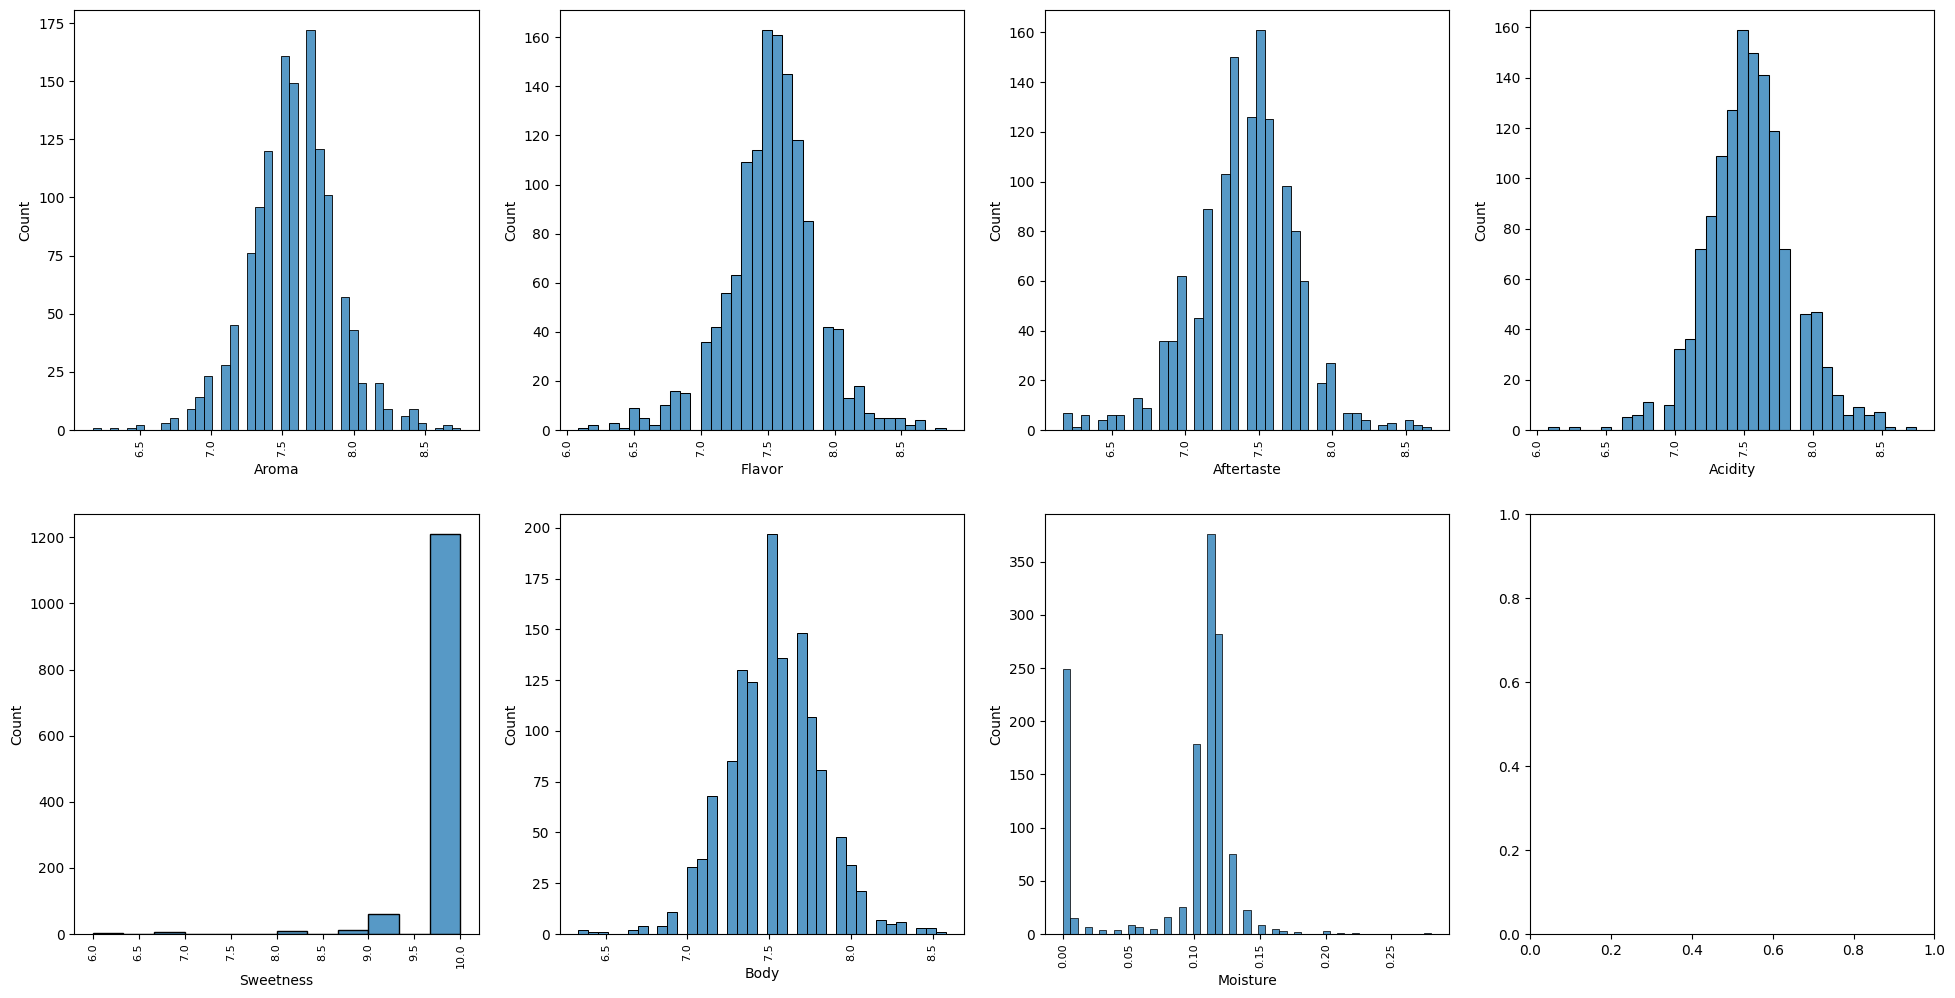

In [25]:
plot_predictors_distribution(df, predictors)

The gaps have not disappeared, they mean that there is simply no data for certain ranges, so you need to reduce the number of ranges for correct display

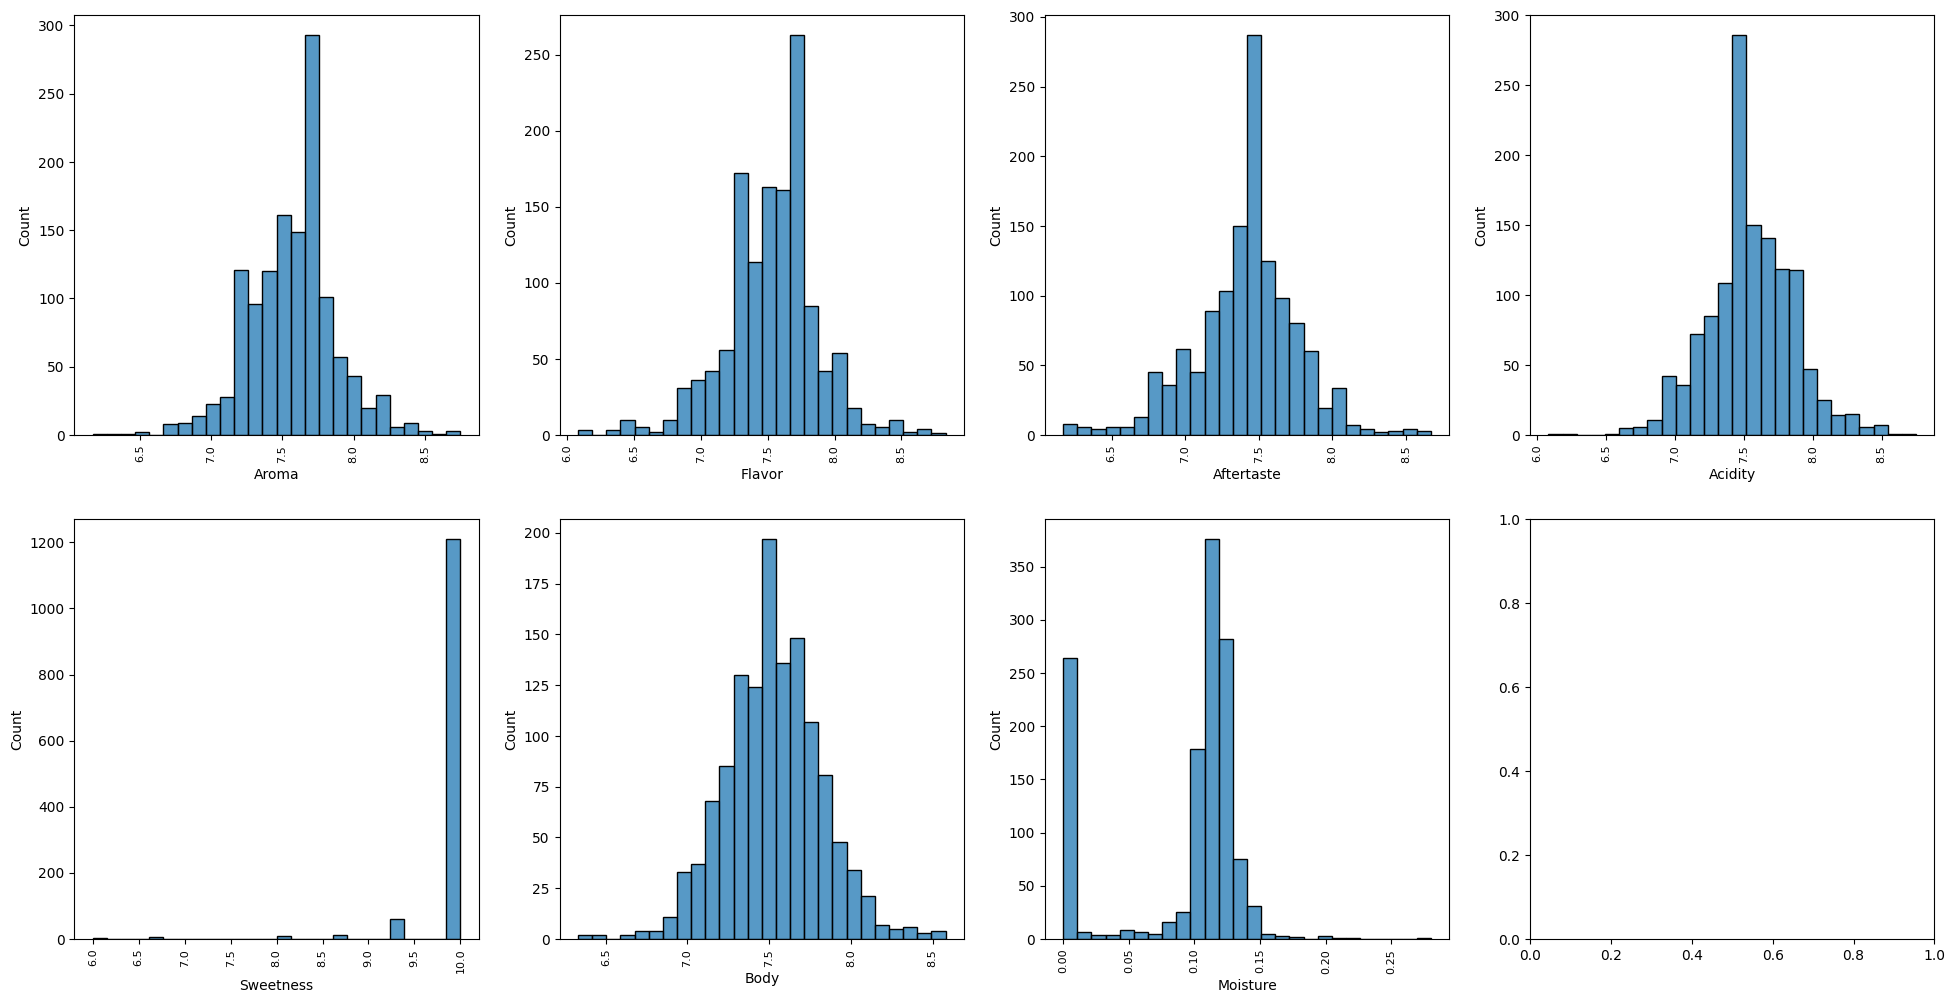

In [26]:
# скопіюю код з функції та вручну встановлю кількість бінів
fig, ax = plt.subplots(2, 4, figsize=(24, 12))
for pred, axes in zip(predictors, ax.flatten()[:-1]):
    sns.histplot(data=df,
                x=pred,
                ax=axes,
                bins=26)
    axes.tick_params(axis="x",
                     labelrotation=90,
                     labelsize=8)
plt.show()

That is better. Now, given that Sweetness has such a skewed distribution, I don't think this variable will have a good effect on the model, so I'll remove it

In [27]:
df.drop("Sweetness", axis=1)

,Aroma,Flavor,Aftertaste,Acidity,Body,Moisture,Country.of.Origin
0,8.67,8.83,8.67,8.75,8.50,0.12,Ethiopia
1,8.75,8.67,8.50,8.58,8.42,0.12,Ethiopia
2,8.42,8.50,8.42,8.42,8.33,0.00,Guatemala
3,8.17,8.58,8.42,8.42,8.50,0.11,Ethiopia
4,8.25,8.50,8.25,8.50,8.42,0.12,Ethiopia
...,...,...,...,...,...,...,...
1312,7.00,6.17,6.17,6.67,6.50,0.10,Honduras
1313,7.00,6.33,6.17,6.50,6.67,0.10,Honduras
1314,7.08,6.83,6.25,7.42,7.25,0.11,Mexico
1315,6.75,6.58,6.42,6.67,7.08,0.14,Haiti


### Missing values

In [28]:
df[predictors].isna().sum()

Aroma         0
Flavor        0
Aftertaste    0
Acidity       0
Sweetness     0
Body          0
Moisture      0
dtype: int64

There are no missing values.

Well, it seems that everything that can be done has already been done. Now it remains to check for duplicates and in general it will be possible to look at the distribution of the target variable and start selecting the model

In [29]:
df.duplicated().sum()

10

Since besides the fact that they can greatly retrain the model, they do not give anything, they all have one fate - death

In [30]:
df = df.drop_duplicates()
df.duplicated().sum()

0

### Розподіл цільової змінної

In [31]:
# function for distribution plotting
def plot_distribution(data):
    fig, ax = plt.subplots(figsize=(20, 8))
    barplot = sns.barplot(x=data.index, y=data.values, ax=ax)
    plt.xticks(rotation=90)

    # adding numbers on top of bars in a plot
    for i in barplot.containers:
        barplot.bar_label(i, )

    plt.xlabel("Name")
    plt.ylabel("Count")
    plt.title("Distribution of countries")

    plt.show()

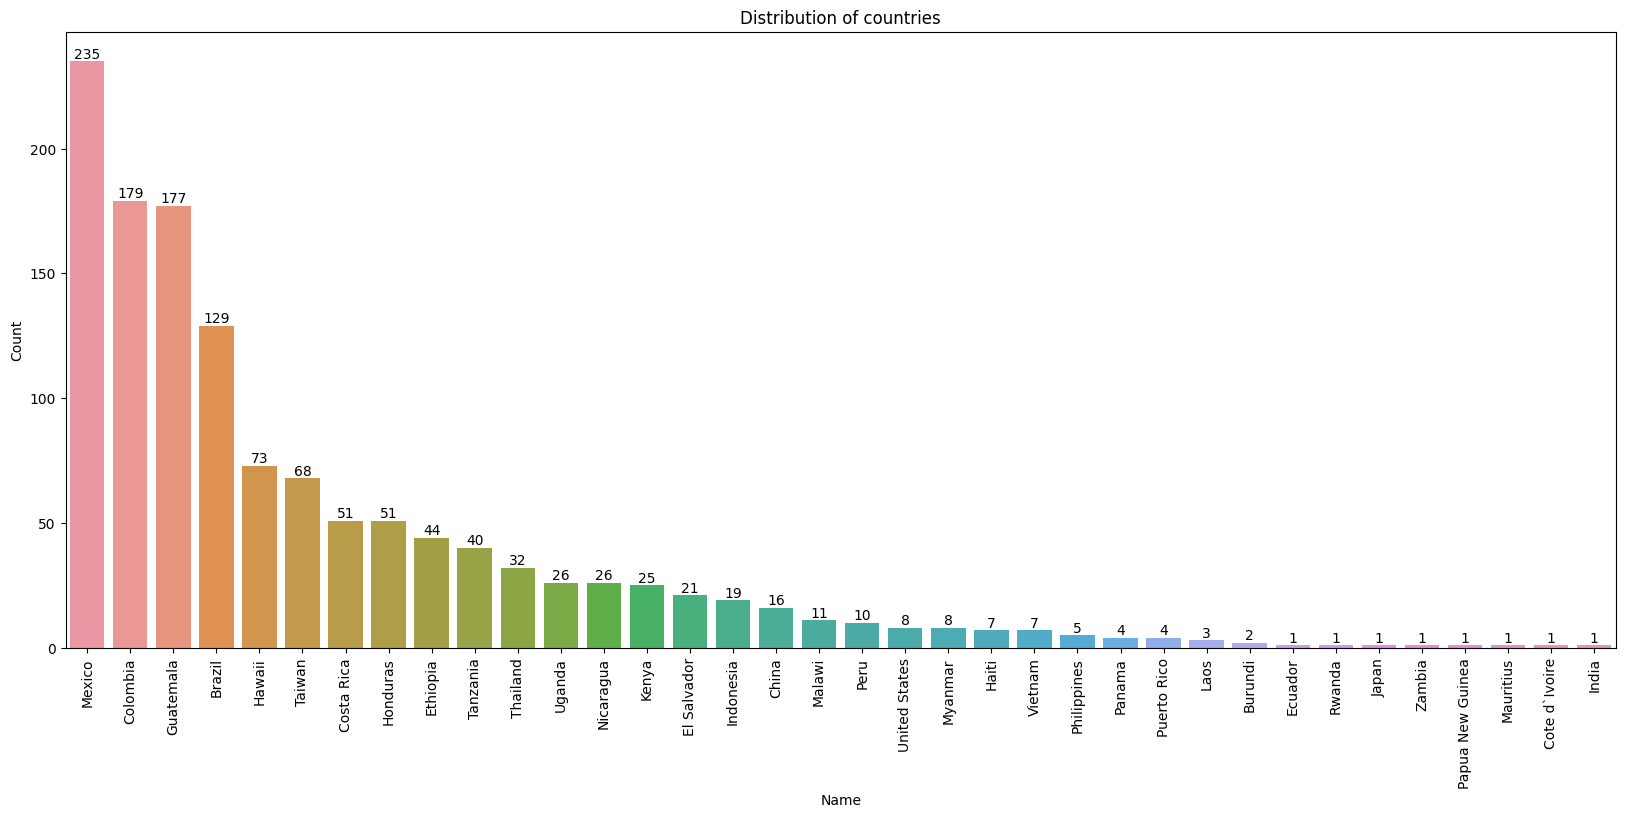

In [32]:
# Creating a distribution of a target variable
countries_dist = df["Country.of.Origin"].value_counts()

plot_distribution(countries_dist)

The distribution of classes is very uneven and many classes generally have too little data, you can try to reduce the number of classes to the 10 largest in order to get the optimal amount of clean data to transfer to the model

In [33]:
# Potential change of the distribution
print(f"Classes\nTotal: {countries_dist.size}")
print(f"Will remain: {10}")
print(f"Will be deleted: {countries_dist.size - 10}\n")
print(f"Observations\nTotal: {countries_dist.sum()}")
print(f"Will remain: {countries_dist[:10].sum()}")
print(f"Will be deleted: {countries_dist.sum() - countries_dist[:10].sum()}")

Classes
Total: 36
Will remain: 10
Will be deleted: 26

Observations
Total: 1289
Will remain: 1047
Will be deleted: 242


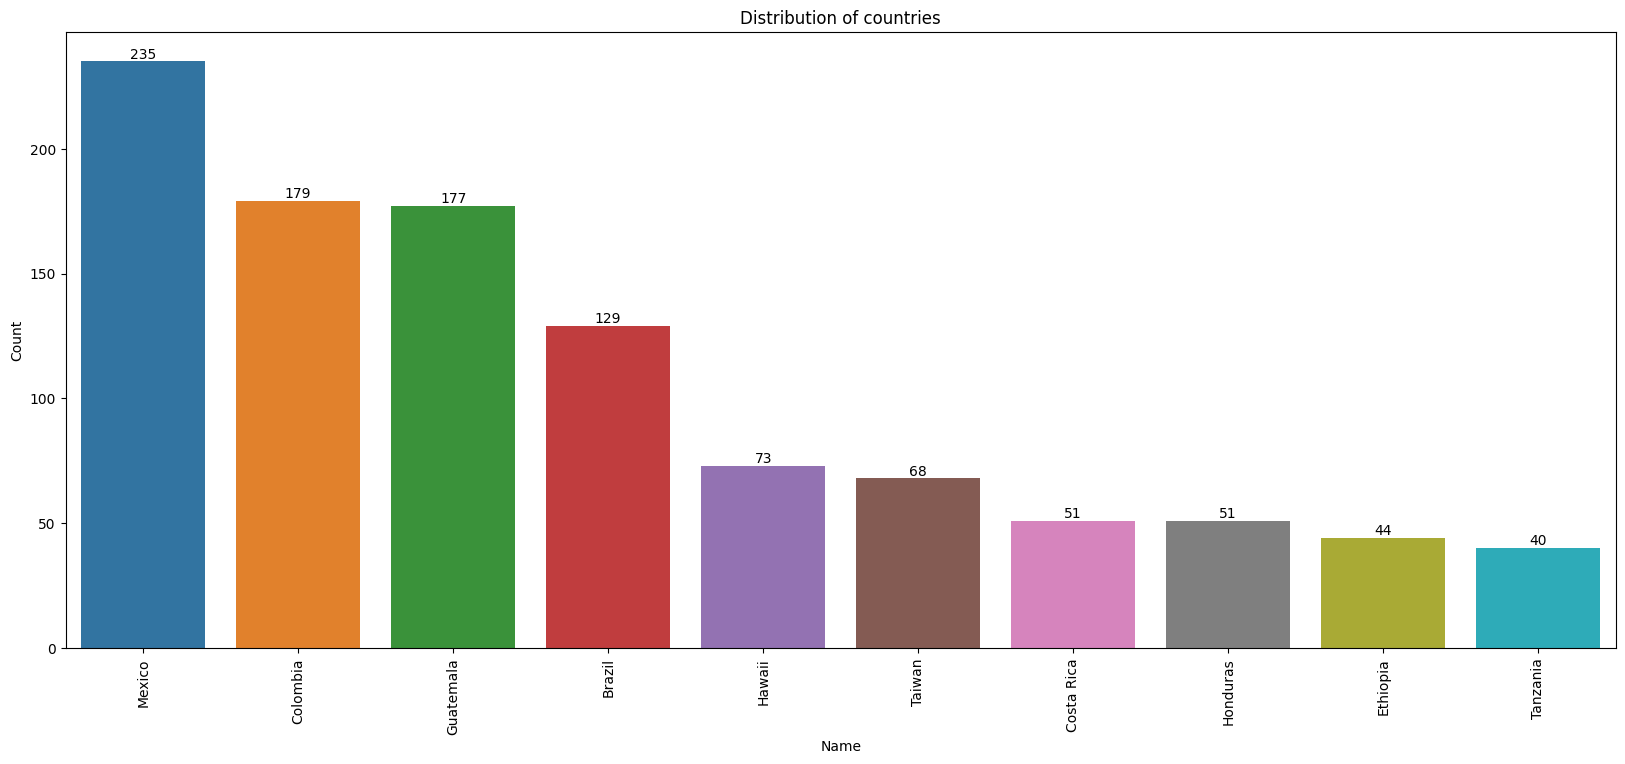

In [34]:
# potential distribution
plot_distribution(countries_dist[:10])

The distribution is still far from balanced, the most and least repeated classes differ by a factor of almost 6. Removing such values will lose ~19% of records and most of the classes, although given that most classes are just getting in the way, this sacrifice may pay off

In [35]:
df = df[df[target].isin(countries_dist[:10].index)]

# index reset again
df = df.reset_index(drop=True)
df.head()

,Aroma,Flavor,Aftertaste,Acidity,Sweetness,Body,Moisture,Country.of.Origin
0,8.67,8.83,8.67,8.75,10.0,8.50,0.12,Ethiopia
1,8.75,8.67,8.50,8.58,10.0,8.42,0.12,Ethiopia
2,8.42,8.50,8.42,8.42,10.0,8.33,0.00,Guatemala
3,8.17,8.58,8.42,8.42,10.0,8.50,0.11,Ethiopia
4,8.25,8.50,8.25,8.50,10.0,8.42,0.12,Ethiopia


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Aroma              1047 non-null   float64
 1   Flavor             1047 non-null   float64
 2   Aftertaste         1047 non-null   float64
 3   Acidity            1047 non-null   float64
 4   Sweetness          1047 non-null   float64
 5   Body               1047 non-null   float64
 6   Moisture           1047 non-null   float64
 7   Country.of.Origin  1047 non-null   object 
dtypes: float64(7), object(1)
memory usage: 65.6+ KB


The data preparation is complete, now it's time to build the model.

## Creating Models

Since I was undecided on the type of model at the beginning of this work, I am thinking of using several models to see which will show the best result. Considering that the data is very unbalanced, I chose the following models:

Decision Tree, Random Forest and SVM

In [37]:
# important packages
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [38]:
# predict and target variables
X = df[predictors]
y = df[target]

### Model 1. Decision Tree

Since I don`t have enough experience, I cannot immediately understand which hyperparameters to set in the decision tree, so I will create a GridSearch to select hyperparameters such as max_depth or min_samples_split.

Given that GridSearchCV itself performs cross validation, I will not divide the data into a validation sample, because GridSearch performs it itself on the training data transferred to the model

In [39]:
# splitting data into 80% of training (including validation) and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=13,
                                                    stratify=y)

In [40]:
# function for hyperpamater tuning
def get_best_model(model, params, x, y, n_iter=200):
    model_search = RandomizedSearchCV(model, cv=5, n_iter=n_iter,
                                     param_distributions=params,
                                     verbose=True,
                                     random_state=13)
              
    model_search.fit(x, y)
    
    return model_search.best_estimator_

In [41]:
# hyperparameters to choose from
params = {
    "max_depth": range(2, 16),
    "min_samples_split": range(2, 11),
    "min_samples_leaf": range(2, 11)
}

tree = DecisionTreeClassifier(class_weight="balanced",
                              random_state=13)

# using a function to get a model with best hyperparameters
best_tree = get_best_model(tree, params, X_train, y_train)
best_tree

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


DecisionTreeClassifier(class_weight='balanced', max_depth=11,
                       min_samples_leaf=3, min_samples_split=9,
                       random_state=13)

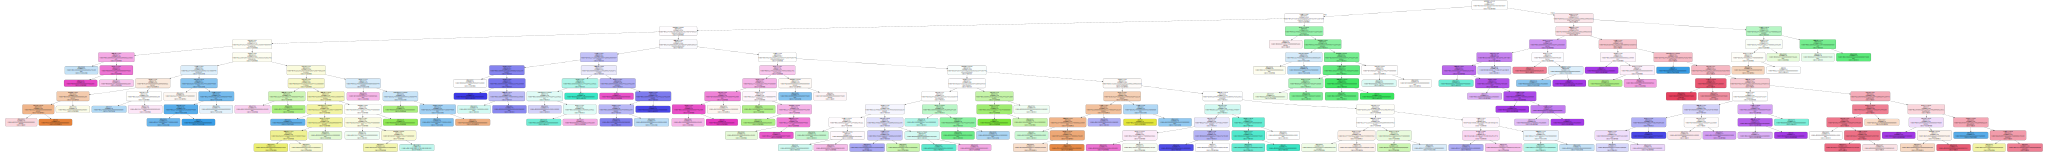

In [42]:
# Tree visualisation package
import graphviz

dot_data = export_graphviz(best_tree,
                           out_file=None,
                           feature_names=X_test.columns,
                           class_names=y_test.values,
                           filled=True,
                           rounded=True)

graph = graphviz.Source(dot_data)
graph

### More useful functions

In [43]:
def plot_confusion_matrix(model, true, predicted):
    """
    Creates confusion matrix heatmap
    """
    cm = confusion_matrix(true, predicted)

    fig, ax = plt.subplots(figsize=(15, 8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model.classes_)
    
    disp.plot(ax=ax, text_kw={"fontsize": 14})
    plt.xticks(rotation=90, fontsize=14)
    plt.yticks(fontsize=14)

    plt.title("Correctness of predictions", fontsize=20)
    plt.xlabel("Predicted", fontsize=16)
    plt.ylabel("Actual", fontsize=16)
    plt.grid(False)
    plt.show()

In [44]:
def get_score_and_cm(model, x, y):
    """
    Constructs score matrix and visualizes the confusion matrix
    """
    pred = model.predict(x)

    # classification report
    print(classification_report(y, pred))

    # heatmap of confusion matrix
    plot_confusion_matrix(model, y, pred)

Trained validated data

              precision    recall  f1-score   support

      Brazil       0.51      0.50      0.50       103
    Colombia       0.75      0.39      0.51       143
  Costa Rica       0.34      0.78      0.47        41
    Ethiopia       0.53      0.86      0.65        35
   Guatemala       0.71      0.43      0.54       142
      Hawaii       0.51      0.69      0.59        58
    Honduras       0.42      0.76      0.54        41
      Mexico       0.85      0.41      0.56       188
      Taiwan       0.43      0.76      0.55        54
    Tanzania       0.37      1.00      0.54        32

    accuracy                           0.54       837
   macro avg       0.54      0.66      0.55       837
weighted avg       0.64      0.54      0.54       837



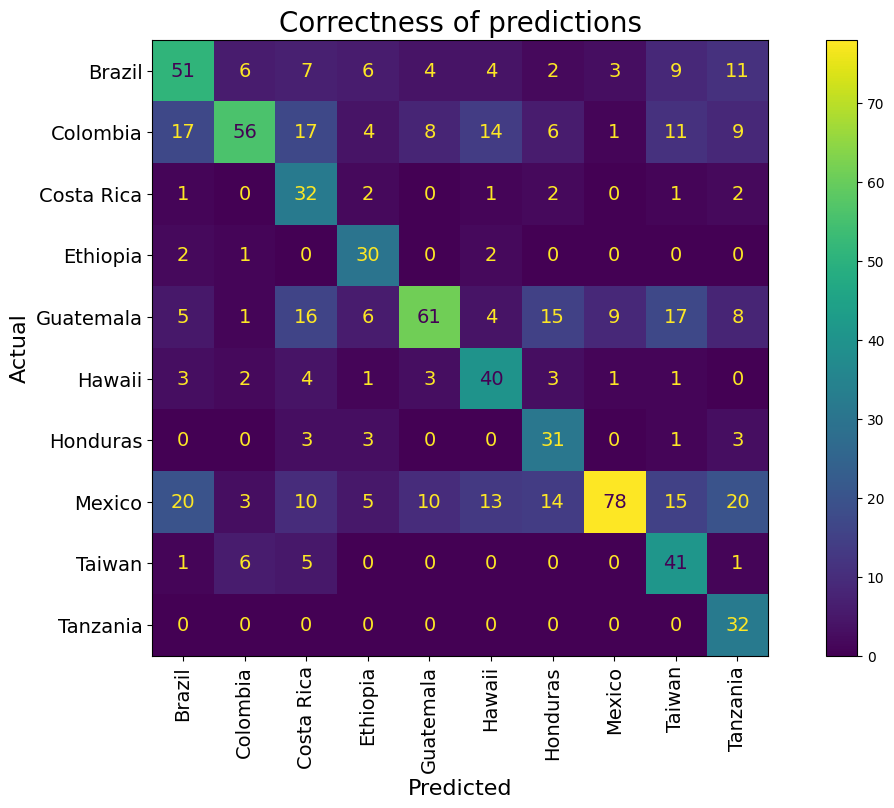

In [45]:
get_score_and_cm(best_tree, X_train, y_train)

Test data

              precision    recall  f1-score   support

      Brazil       0.08      0.08      0.08        26
    Colombia       0.36      0.28      0.31        36
  Costa Rica       0.12      0.20      0.15        10
    Ethiopia       0.15      0.22      0.18         9
   Guatemala       0.57      0.23      0.33        35
      Hawaii       0.20      0.20      0.20        15
    Honduras       0.23      0.50      0.31        10
      Mexico       0.57      0.26      0.35        47
      Taiwan       0.12      0.21      0.16        14
    Tanzania       0.16      0.62      0.25         8

    accuracy                           0.25       210
   macro avg       0.26      0.28      0.23       210
weighted avg       0.35      0.25      0.26       210



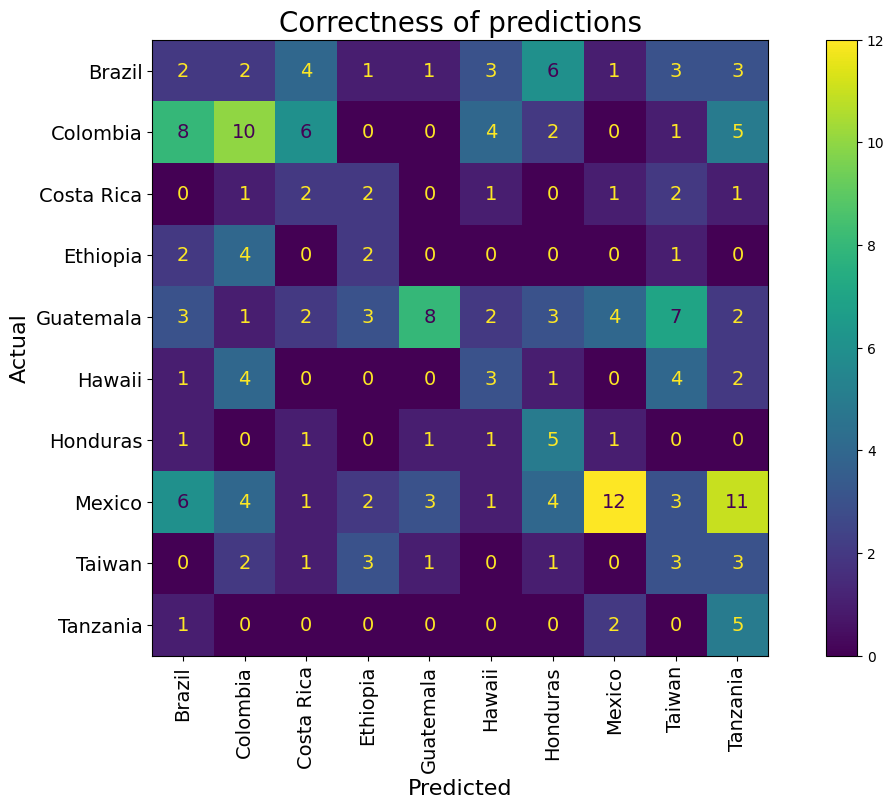

In [46]:
get_score_and_cm(best_tree, X_test, y_test)

The model is obviously retrained, the weighted avg f1-score indicators differ twice.

Something must be done about it

### Feature selection 2

Having learned that the features that I chose with my soul and a little bit of my brain created a bad model, I decided to look at the features from the point of view of building a model, whether they are correlated with each other and the same, lead to a bad model. I will do this with the help of the correlation matrix using the Pearson coefficient.

In order to effectively select features and not retrain the model, the data must be validated, and given that to select the hyperparameters of the tree, I am going to select on new data again and again using GridSearch, in which cross-validation occurs automatically, then the samples will be divided into 80% and 20 %

In [47]:
def plot_correlation_matrix(corr_matr):
    """
    Creates a heat map of a correlation matrix
    """
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matr, annot=True, cmap="viridis")

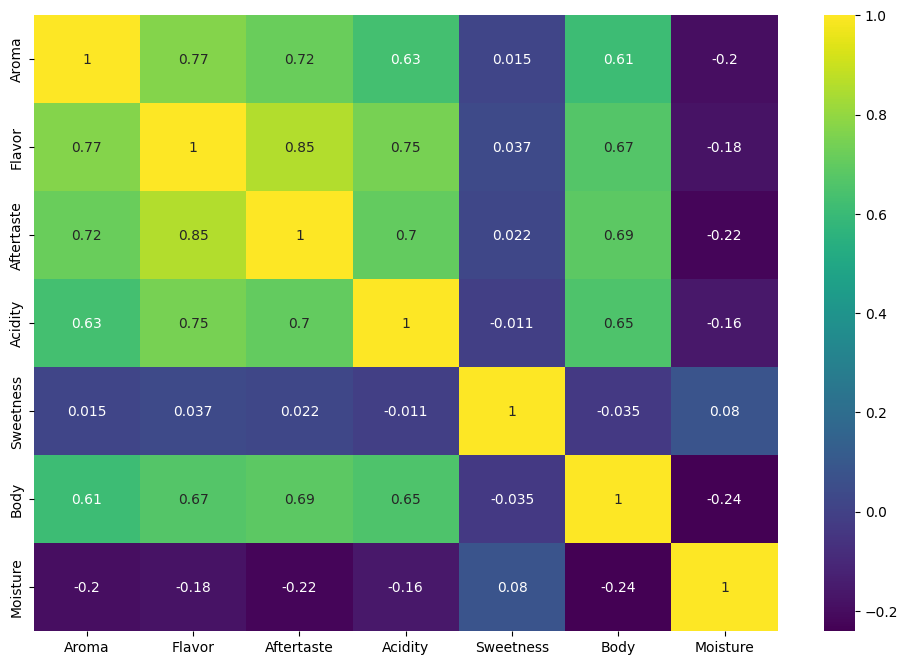

In [48]:
plot_correlation_matrix(X_train.corr())

The correlation matrix shows that the `Flavor` variable has high (> 0.7) indicators with all others. Also, `Aftertaste` and `Body` have correlation indicators close to 0.7, but if you think about it a little, you don't want to remove the taste, due to the fact that it most likely has the highest correlation with the target variable (captests are held among baristas, where people gather and try to determine which coffee beans are brewed exactly to the taste of coffee, I suspect that the aftertaste also appears there), so these signs may be the most important. For now, I'm thinking of removing just the Body to see if that will be enough to improve the model's performance or not

#### Model without `Body`

In [49]:
# removing `Body` from both sets
X_train = X_train.drop("Body", axis=1)
X_test = X_test.drop("Body", axis=1)

# selecting a model
best_tree = get_best_model(tree, params, X_train, y_train)
best_tree

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


DecisionTreeClassifier(class_weight='balanced', max_depth=11,
                       min_samples_leaf=2, min_samples_split=10,
                       random_state=13)

Trained validated data

              precision    recall  f1-score   support

      Brazil       0.57      0.51      0.54       103
    Colombia       0.65      0.54      0.59       143
  Costa Rica       0.43      0.63      0.51        41
    Ethiopia       0.42      0.86      0.57        35
   Guatemala       0.78      0.41      0.54       142
      Hawaii       0.54      0.55      0.55        58
    Honduras       0.44      0.76      0.56        41
      Mexico       0.85      0.40      0.54       188
      Taiwan       0.39      0.78      0.52        54
    Tanzania       0.31      0.94      0.47        32

    accuracy                           0.54       837
   macro avg       0.54      0.64      0.54       837
weighted avg       0.64      0.54      0.55       837



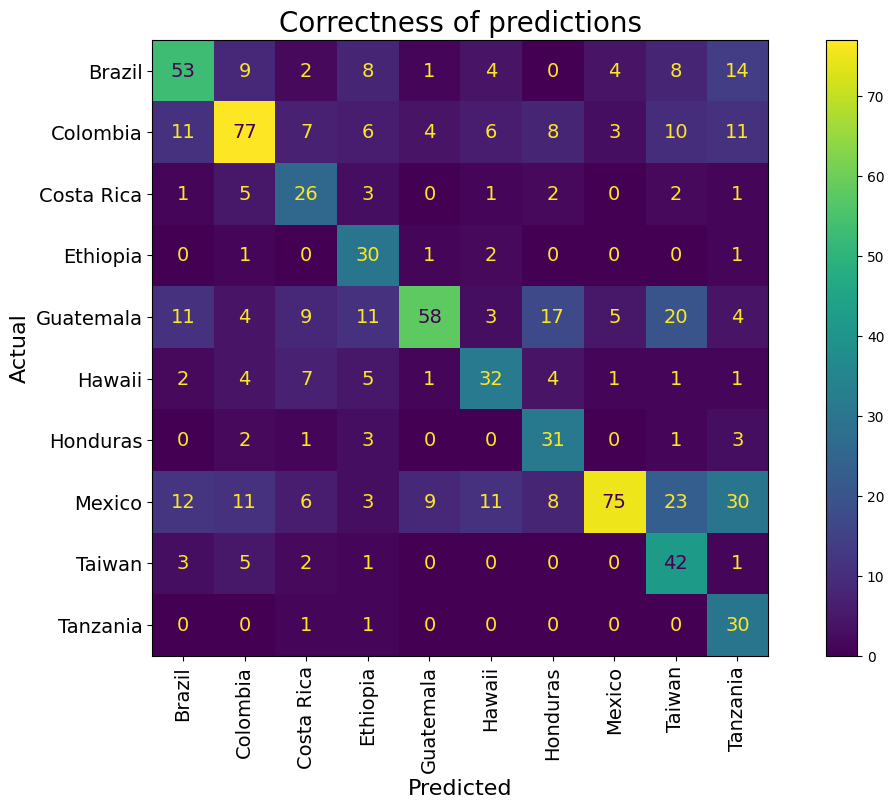

In [50]:
get_score_and_cm(best_tree, X_train, y_train)

Test data

              precision    recall  f1-score   support

      Brazil       0.19      0.12      0.14        26
    Colombia       0.37      0.39      0.38        36
  Costa Rica       0.20      0.10      0.13        10
    Ethiopia       0.16      0.33      0.21         9
   Guatemala       0.53      0.23      0.32        35
      Hawaii       0.15      0.13      0.14        15
    Honduras       0.21      0.40      0.28        10
      Mexico       0.53      0.17      0.26        47
      Taiwan       0.11      0.21      0.14        14
    Tanzania       0.17      0.88      0.28         8

    accuracy                           0.25       210
   macro avg       0.26      0.30      0.23       210
weighted avg       0.35      0.25      0.25       210



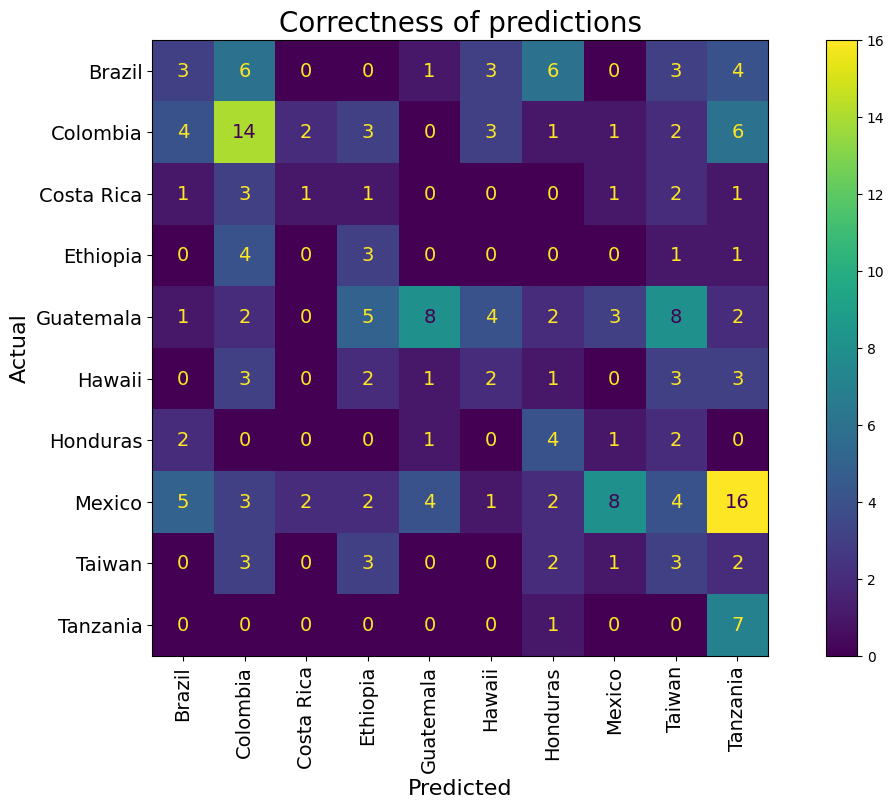

In [51]:
get_score_and_cm(best_tree, X_test, y_test)

Retraining did not disappear, the model performance on training and test data remained the same

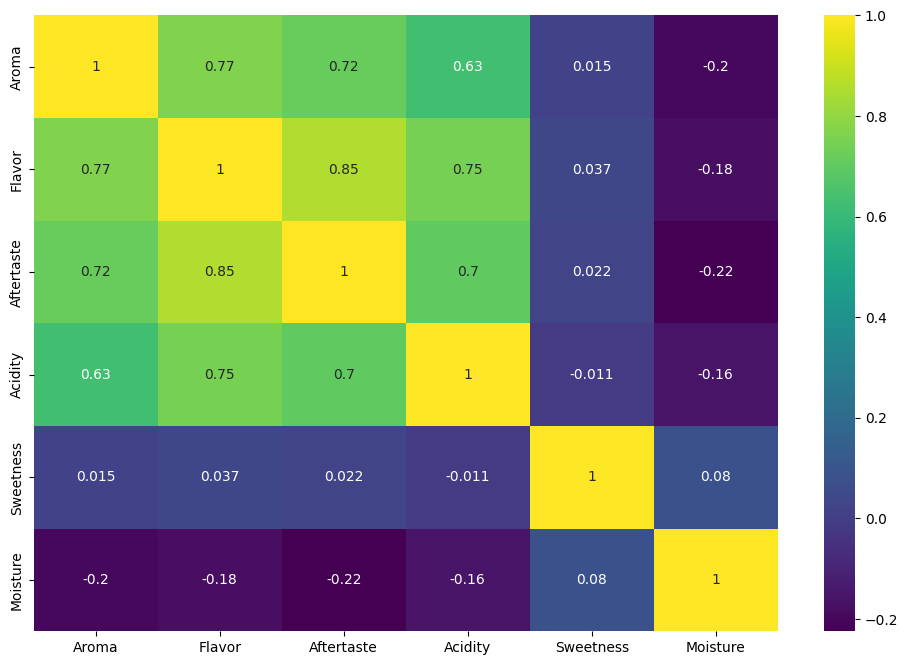

In [52]:
plot_correlation_matrix(X_train.corr())

`Aroma` and `Acidity` are 2 new contenders for removal. Again, using your brain, `Aroma` sounds like a better indicator of a country than the `Acidity` of a drink. Therefore, I will remove the `Acidity`

#### Model without `Body` and `Acidity`

In [53]:
# removing `Acidity` from sets with no `Body` variable
X_train = X_train.drop("Acidity", axis=1)
X_test = X_test.drop("Acidity", axis=1)

best_tree = get_best_model(tree, params, X_train, y_train)
best_tree

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


DecisionTreeClassifier(class_weight='balanced', max_depth=7, min_samples_leaf=5,
                       min_samples_split=7, random_state=13)

Trained validated data

              precision    recall  f1-score   support

      Brazil       0.51      0.24      0.33       103
    Colombia       0.66      0.44      0.53       143
  Costa Rica       0.19      0.41      0.26        41
    Ethiopia       0.42      0.77      0.54        35
   Guatemala       0.34      0.46      0.39       142
      Hawaii       0.31      0.57      0.40        58
    Honduras       0.35      0.41      0.38        41
      Mexico       0.80      0.32      0.46       188
      Taiwan       0.64      0.26      0.37        54
    Tanzania       0.28      0.84      0.43        32

    accuracy                           0.42       837
   macro avg       0.45      0.47      0.41       837
weighted avg       0.53      0.42      0.42       837



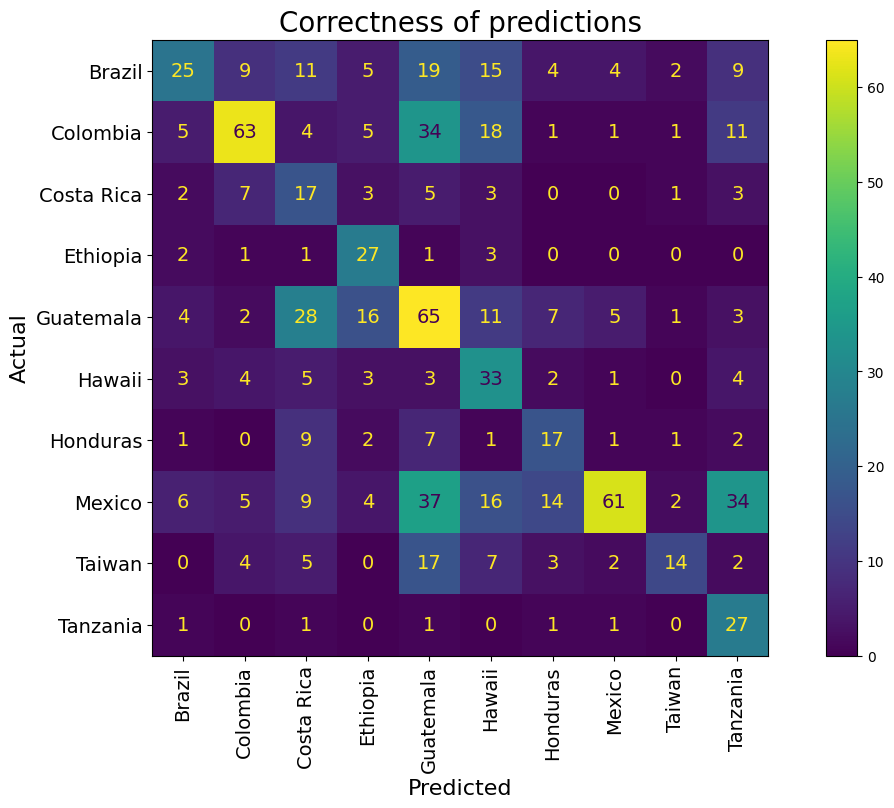

In [54]:
get_score_and_cm(best_tree, X_train, y_train)

Test data

              precision    recall  f1-score   support

      Brazil       0.22      0.08      0.11        26
    Colombia       0.42      0.28      0.33        36
  Costa Rica       0.00      0.00      0.00        10
    Ethiopia       0.07      0.11      0.09         9
   Guatemala       0.25      0.29      0.27        35
      Hawaii       0.24      0.47      0.32        15
    Honduras       0.14      0.20      0.17        10
      Mexico       0.58      0.15      0.24        47
      Taiwan       0.00      0.00      0.00        14
    Tanzania       0.18      0.88      0.30         8

    accuracy                           0.22       210
   macro avg       0.21      0.24      0.18       210
weighted avg       0.31      0.22      0.21       210



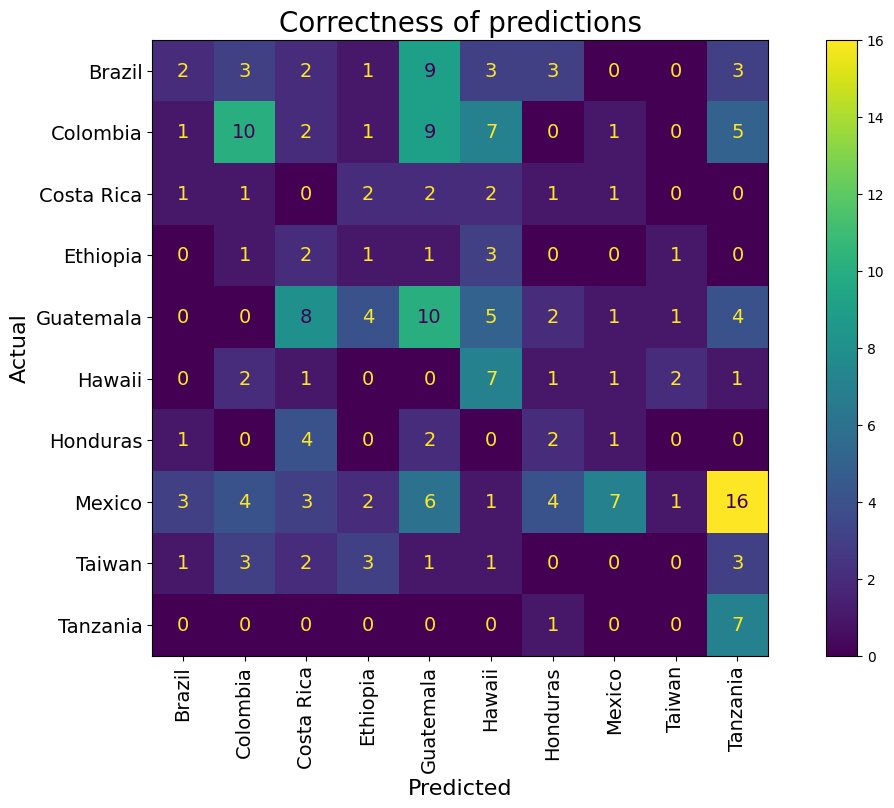

In [55]:
get_score_and_cm(best_tree, X_test, y_test)

Removing `Acidity` was a bad idea, the model began to show worse results.

At the same time, retraining did not go anywhere, it even turned into undertraining

### Model 2. Random Forest

A balanced tree shows clear overfitting.
Now you have to try RandomForest of balanced trees and see if it shows a better result

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
# new data with all predictor variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y,
                                                    random_state=13)

In [58]:
# сreating a random forest
rfc = RandomForestClassifier(class_weight="balanced",
                             random_state=13)

# hyperparameters for a forest
rfc_params = params.copy()
rfc_params["n_estimators"] = range(5, 21)

#### Creating a model

In [59]:
# model with best hyperparameters
best_rfc = get_best_model(rfc, rfc_params, X_train, y_train)
best_rfc

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomForestClassifier(class_weight='balanced', max_depth=12,
                       min_samples_leaf=2, min_samples_split=4, n_estimators=13,
                       random_state=13)

Trained validated data

              precision    recall  f1-score   support

      Brazil       0.85      0.72      0.78       103
    Colombia       0.82      0.85      0.84       143
  Costa Rica       0.97      0.85      0.91        41
    Ethiopia       0.77      0.94      0.85        35
   Guatemala       0.88      0.80      0.84       142
      Hawaii       0.74      0.86      0.79        58
    Honduras       0.69      0.90      0.78        41
      Mexico       0.91      0.76      0.83       188
      Taiwan       0.78      0.93      0.85        54
    Tanzania       0.62      0.97      0.76        32

    accuracy                           0.82       837
   macro avg       0.80      0.86      0.82       837
weighted avg       0.84      0.82      0.82       837



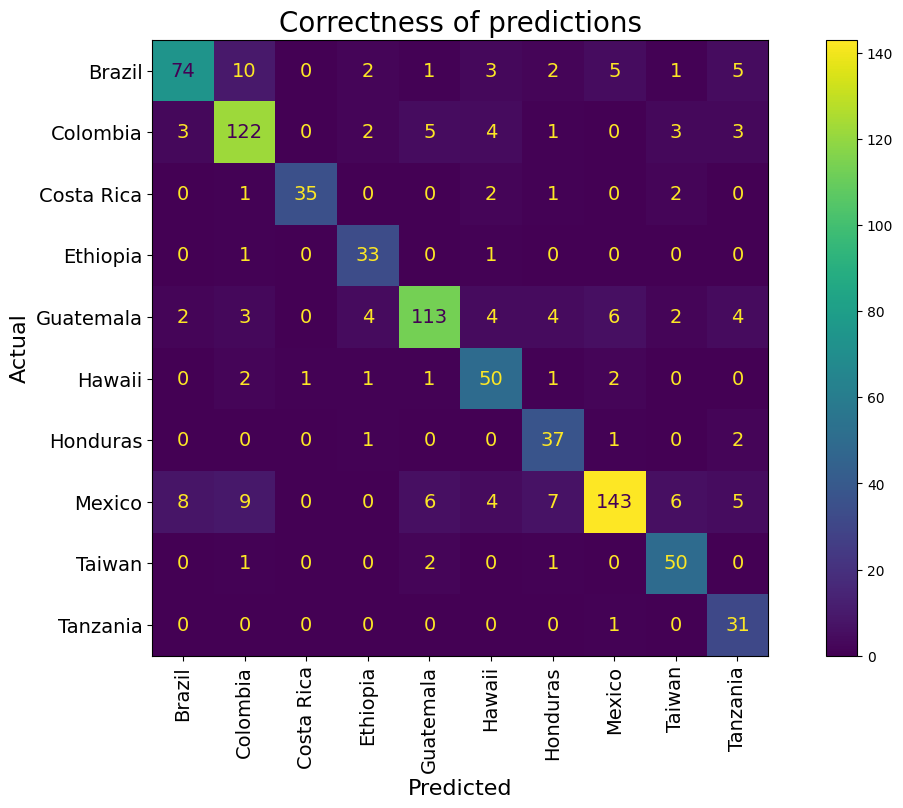

In [60]:
get_score_and_cm(best_rfc, X_train, y_train)

Test data

              precision    recall  f1-score   support

      Brazil       0.11      0.08      0.09        26
    Colombia       0.40      0.58      0.47        36
  Costa Rica       0.25      0.10      0.14        10
    Ethiopia       0.27      0.33      0.30         9
   Guatemala       0.52      0.37      0.43        35
      Hawaii       0.20      0.13      0.16        15
    Honduras       0.18      0.30      0.22        10
      Mexico       0.48      0.49      0.48        47
      Taiwan       0.17      0.07      0.10        14
    Tanzania       0.29      0.62      0.40         8

    accuracy                           0.35       210
   macro avg       0.29      0.31      0.28       210
weighted avg       0.34      0.35      0.34       210



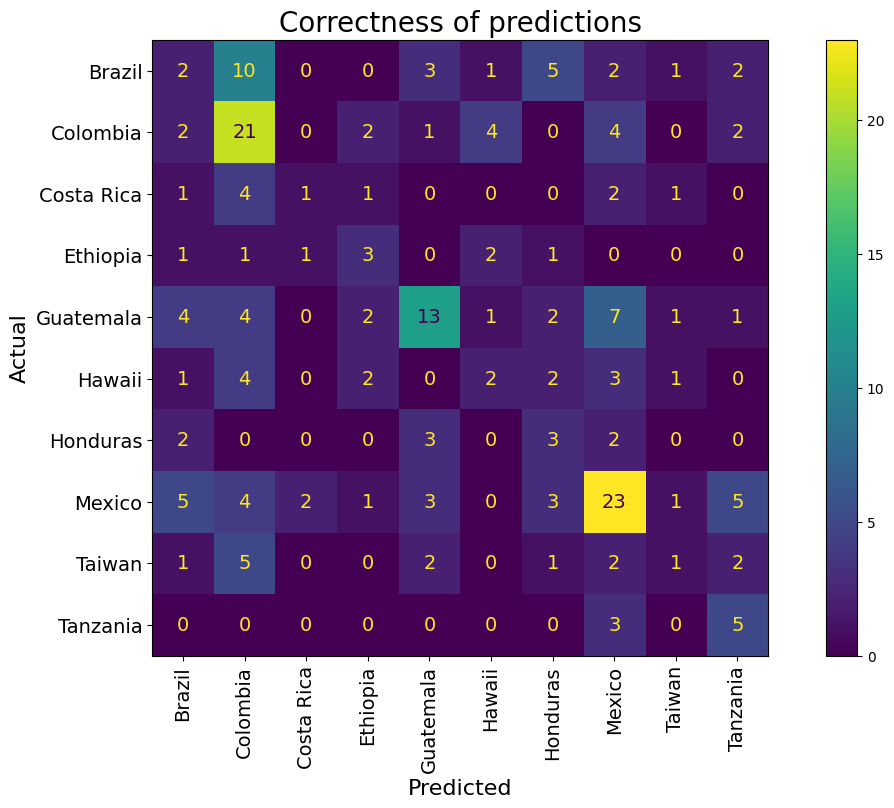

In [61]:
get_score_and_cm(best_rfc, X_test, y_test)

The model was retrained again, but the f1-score on the training data became higher, which indicates that the decision tree is better suited for this task. But I'm starting to think that the problem is a lack of data. I wonder what will happen if I divide the samples into 70-30% instead of 80-20

#### Model with fewer training data and more test

In [62]:
# new split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y,
                                                    random_state=13)

In [63]:
# new model
best_rfc = get_best_model(rfc, rfc_params, X_train, y_train)
best_rfc

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomForestClassifier(class_weight='balanced', max_depth=14,
                       min_samples_leaf=3, min_samples_split=4, n_estimators=18,
                       random_state=13)

Trained validated data

              precision    recall  f1-score   support

      Brazil       0.71      0.63      0.67        90
    Colombia       0.77      0.70      0.74       125
  Costa Rica       0.75      0.92      0.83        36
    Ethiopia       0.62      0.97      0.76        31
   Guatemala       0.86      0.67      0.75       124
      Hawaii       0.69      0.84      0.76        51
    Honduras       0.57      0.83      0.67        36
      Mexico       0.80      0.66      0.72       164
      Taiwan       0.72      0.70      0.71        47
    Tanzania       0.52      1.00      0.68        28

    accuracy                           0.73       732
   macro avg       0.70      0.79      0.73       732
weighted avg       0.75      0.73      0.73       732



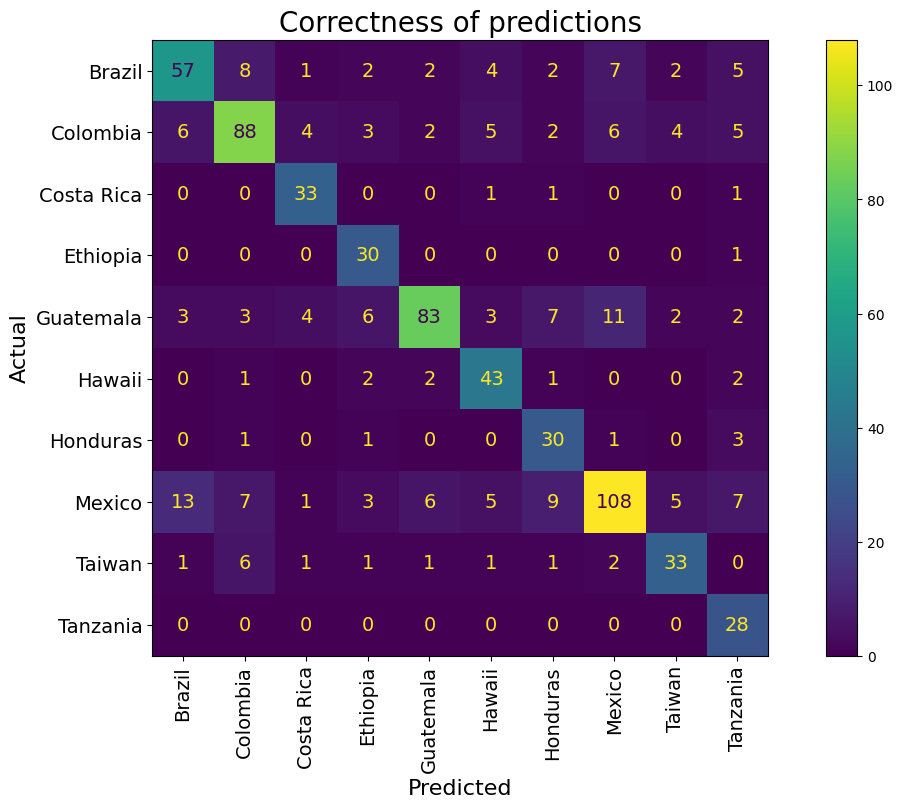

In [64]:
get_score_and_cm(best_rfc, X_train, y_train)

Test data

              precision    recall  f1-score   support

      Brazil       0.22      0.13      0.16        39
    Colombia       0.38      0.37      0.37        54
  Costa Rica       0.10      0.13      0.11        15
    Ethiopia       0.32      0.46      0.37        13
   Guatemala       0.55      0.40      0.46        53
      Hawaii       0.21      0.27      0.24        22
    Honduras       0.27      0.27      0.27        15
      Mexico       0.52      0.46      0.49        71
      Taiwan       0.18      0.14      0.16        21
    Tanzania       0.26      0.83      0.40        12

    accuracy                           0.35       315
   macro avg       0.30      0.35      0.30       315
weighted avg       0.37      0.35      0.35       315



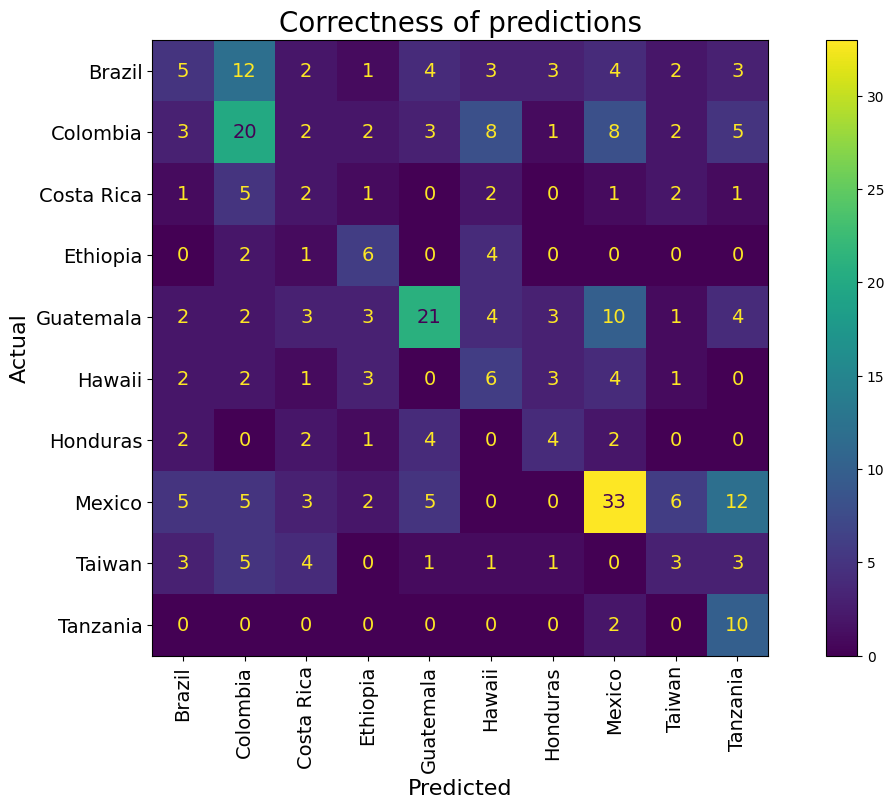

In [65]:
get_score_and_cm(best_rfc, X_test, y_test)

Unfortunately, the retraining did not disappear. I have one last idea left, to change the hyperparameters to simplify the model. This can be done by reducing the maximum depth of the tree and increasing the number of entries for splitting branches

#### Model with new hyperparameters

In [66]:
# current hyperparameters
rfc_params

{'max_depth': range(2, 16),
 'min_samples_split': range(2, 11),
 'min_samples_leaf': range(2, 11),
 'n_estimators': range(5, 21)}

In [67]:
new_rfc_params = {'max_depth': range(2, 11),
                  'min_samples_split': range(5, 11),
                  'min_samples_leaf': range(5, 11),
                  'n_estimators': range(1, 11)}

In [68]:
# back to 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y,
                                                    random_state=13)

I will return the distribution of training and test data to 80-20, because on the test data they show the same result, but on the training data the old distribution gives +10% correctness

In [69]:
# model selection
best_rfc = get_best_model(rfc, new_rfc_params, X_train, y_train)
best_rfc

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomForestClassifier(class_weight='balanced', max_depth=7, min_samples_leaf=5,
                       min_samples_split=7, n_estimators=10, random_state=13)

Trained validated data

              precision    recall  f1-score   support

      Brazil       0.55      0.39      0.45       103
    Colombia       0.57      0.52      0.55       143
  Costa Rica       0.46      0.51      0.48        41
    Ethiopia       0.40      0.77      0.53        35
   Guatemala       0.66      0.44      0.53       142
      Hawaii       0.46      0.53      0.50        58
    Honduras       0.33      0.61      0.43        41
      Mexico       0.80      0.44      0.56       188
      Taiwan       0.41      0.48      0.44        54
    Tanzania       0.26      0.94      0.41        32

    accuracy                           0.50       837
   macro avg       0.49      0.56      0.49       837
weighted avg       0.58      0.50      0.51       837



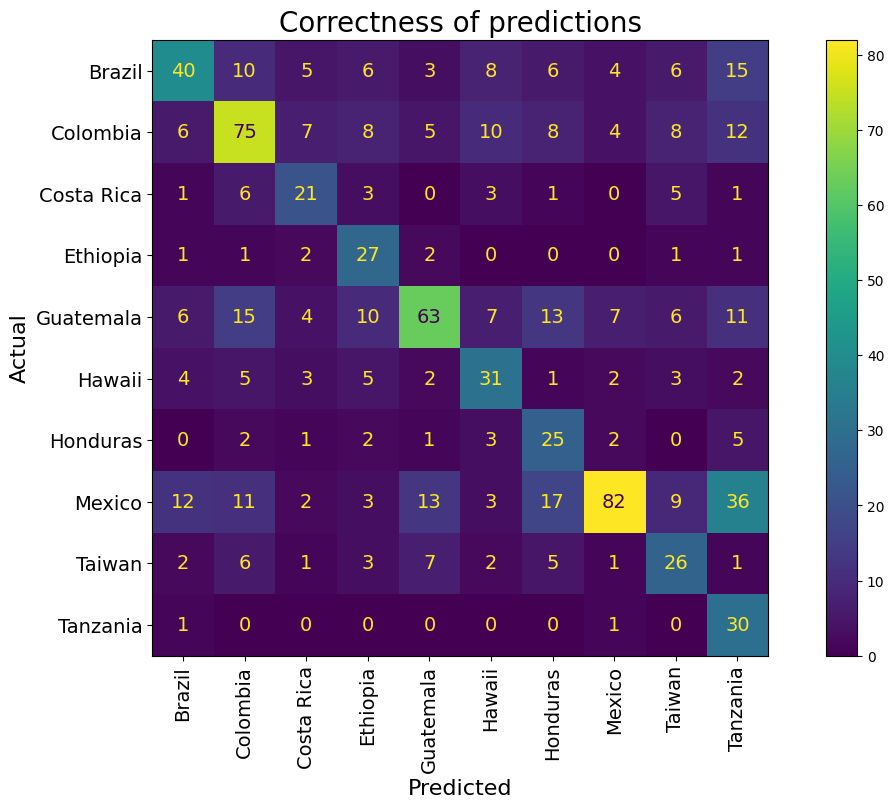

In [70]:
get_score_and_cm(best_rfc, X_train, y_train)

Test data

              precision    recall  f1-score   support

      Brazil       0.14      0.12      0.13        26
    Colombia       0.33      0.36      0.35        36
  Costa Rica       0.22      0.20      0.21        10
    Ethiopia       0.35      0.78      0.48         9
   Guatemala       0.47      0.26      0.33        35
      Hawaii       0.15      0.13      0.14        15
    Honduras       0.29      0.40      0.33        10
      Mexico       0.52      0.28      0.36        47
      Taiwan       0.07      0.07      0.07        14
    Tanzania       0.19      0.88      0.32         8

    accuracy                           0.29       210
   macro avg       0.27      0.35      0.27       210
weighted avg       0.33      0.29      0.29       210



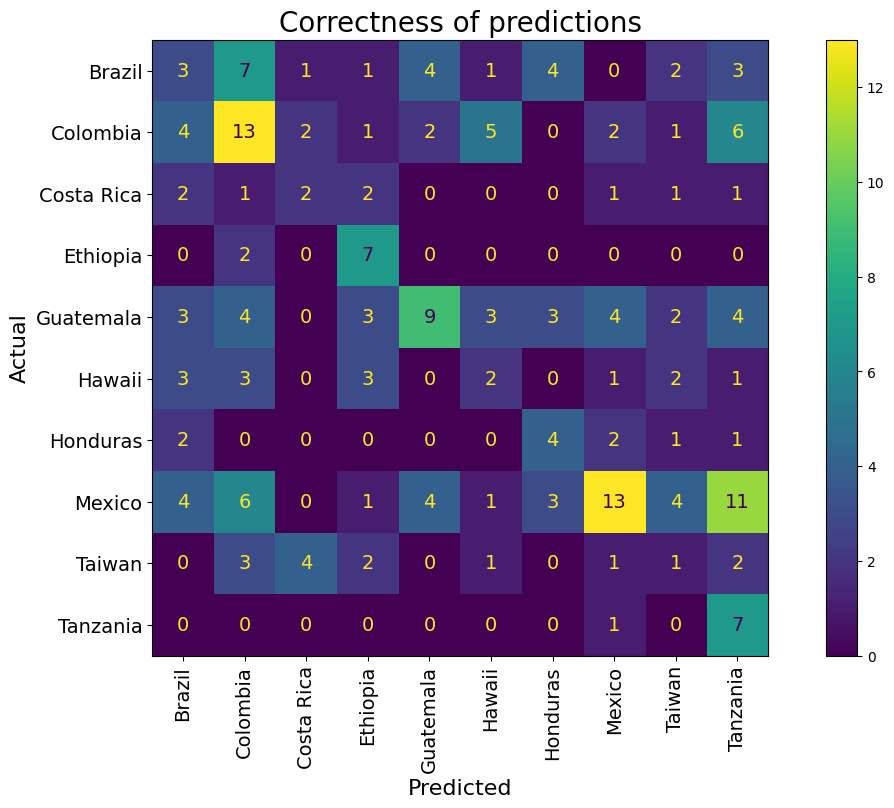

In [71]:
get_score_and_cm(best_rfc, X_test, y_test)

The new hyperparameters did not help to avoid overtraining and even made the model worse

### Моdel 3. Support Vector Machine (SVM) linear version

Models based on decision trees show retraining. Perhaps it depends not on the type of model, but on the small amount of data, but it is better to check one more model, and then draw conclusions

In [72]:
from sklearn.svm import LinearSVC

In [73]:
svm = LinearSVC(class_weight="balanced",
                verbose=True,
                random_state=13)

svm_params = {'C': [0.1, 1, 10], 
              'tol': [1, 0.1, 0.01, 0.001, 0.0001],
              'max_iter': range(31000, 51000, 5000)}

best_svm = get_best_model(svm, svm_params, X_train, y_train, 20)
best_svm

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=10, class_weight='balanced', max_iter=31000, random_state=13,
          tol=0.001, verbose=True)

Validated training data

              precision    recall  f1-score   support

      Brazil       0.29      0.14      0.19       103
    Colombia       0.44      0.44      0.44       143
  Costa Rica       0.21      0.07      0.11        41
    Ethiopia       0.18      0.74      0.29        35
   Guatemala       0.44      0.44      0.44       142
      Hawaii       0.41      0.19      0.26        58
    Honduras       0.43      0.07      0.12        41
      Mexico       0.45      0.53      0.49       188
      Taiwan       0.30      0.11      0.16        54
    Tanzania       0.15      0.34      0.21        32

    accuracy                           0.36       837
   macro avg       0.33      0.31      0.27       837
weighted avg       0.38      0.36      0.34       837



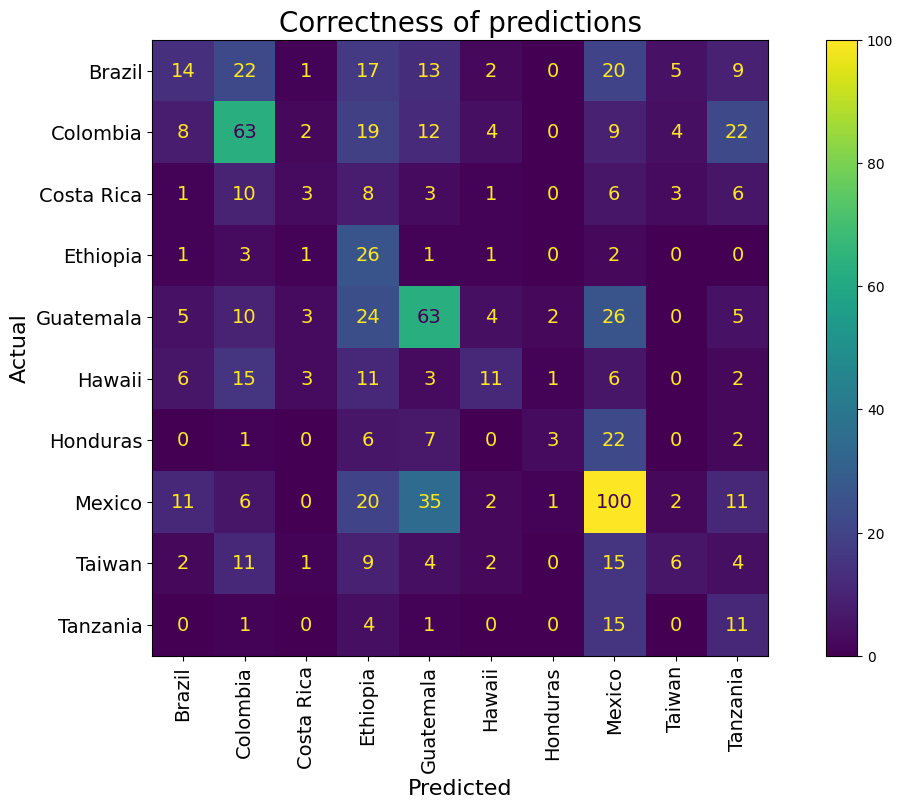

In [74]:
get_score_and_cm(best_svm, X_train, y_train)

Test data

              precision    recall  f1-score   support

      Brazil       0.08      0.04      0.05        26
    Colombia       0.39      0.39      0.39        36
  Costa Rica       0.00      0.00      0.00        10
    Ethiopia       0.23      0.78      0.35         9
   Guatemala       0.45      0.54      0.49        35
      Hawaii       0.38      0.20      0.26        15
    Honduras       1.00      0.10      0.18        10
      Mexico       0.43      0.43      0.43        47
      Taiwan       0.33      0.07      0.12        14
    Tanzania       0.20      0.62      0.30         8

    accuracy                           0.34       210
   macro avg       0.35      0.32      0.26       210
weighted avg       0.36      0.34      0.31       210



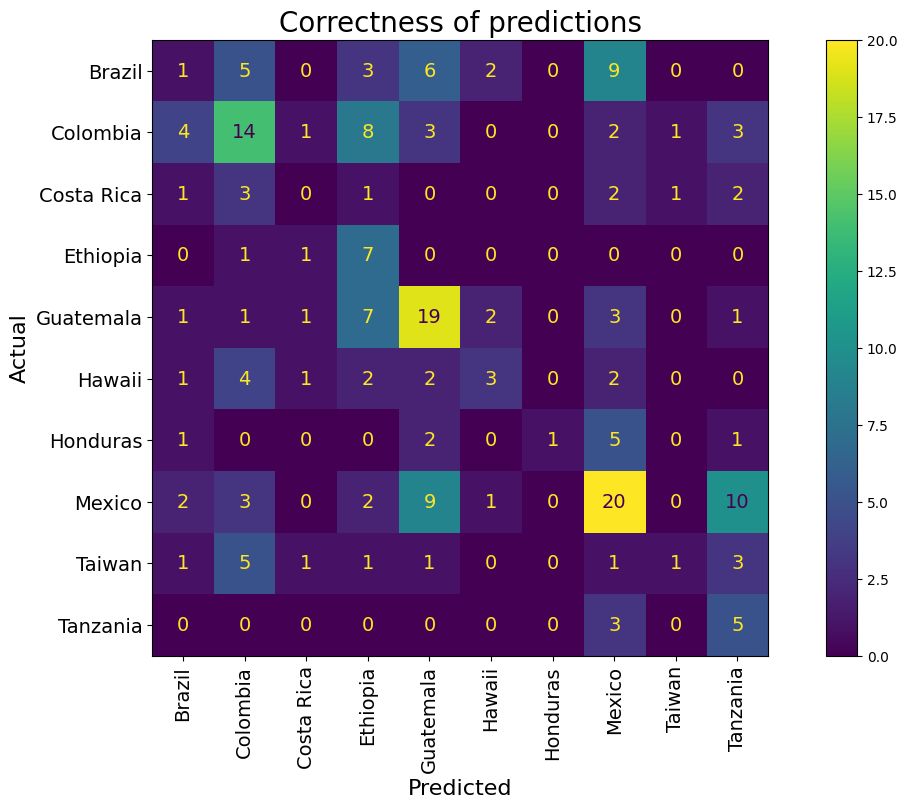

In [75]:
get_score_and_cm(best_svm, X_test, y_test)

It can be seen that the vector model does not cope with this task, there is a clear undertraining (~31% accuracy on both datasets, and this is taking into account that the accuracy is usually overestimated with an uneven distribution)

Since the vector approach performs many times worse than the decision tree, and models based on decision trees show direct retraining, I will try another strategy, boosting, namely GradientBoost

### Model 4. GradientBoost

In [76]:
from sklearn.ensemble import GradientBoostingClassifier

In [77]:
grad_params = params.copy()
grad_params["n_estimators"] = [1, 5, 10, 15, 20]

gradient_clf = GradientBoostingClassifier(random_state=13)

best_grad = get_best_model(gradient_clf, grad_params, X_train, y_train)
best_grad

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


GradientBoostingClassifier(min_samples_leaf=9, min_samples_split=8,
                           n_estimators=15, random_state=13)

Validated training data

              precision    recall  f1-score   support

      Brazil       0.60      0.44      0.51       103
    Colombia       0.55      0.74      0.63       143
  Costa Rica       0.86      0.15      0.25        41
    Ethiopia       0.68      0.60      0.64        35
   Guatemala       0.50      0.67      0.57       142
      Hawaii       0.68      0.40      0.50        58
    Honduras       1.00      0.20      0.33        41
      Mexico       0.54      0.75      0.63       188
      Taiwan       0.66      0.43      0.52        54
    Tanzania       0.83      0.16      0.26        32

    accuracy                           0.57       837
   macro avg       0.69      0.45      0.48       837
weighted avg       0.62      0.57      0.54       837



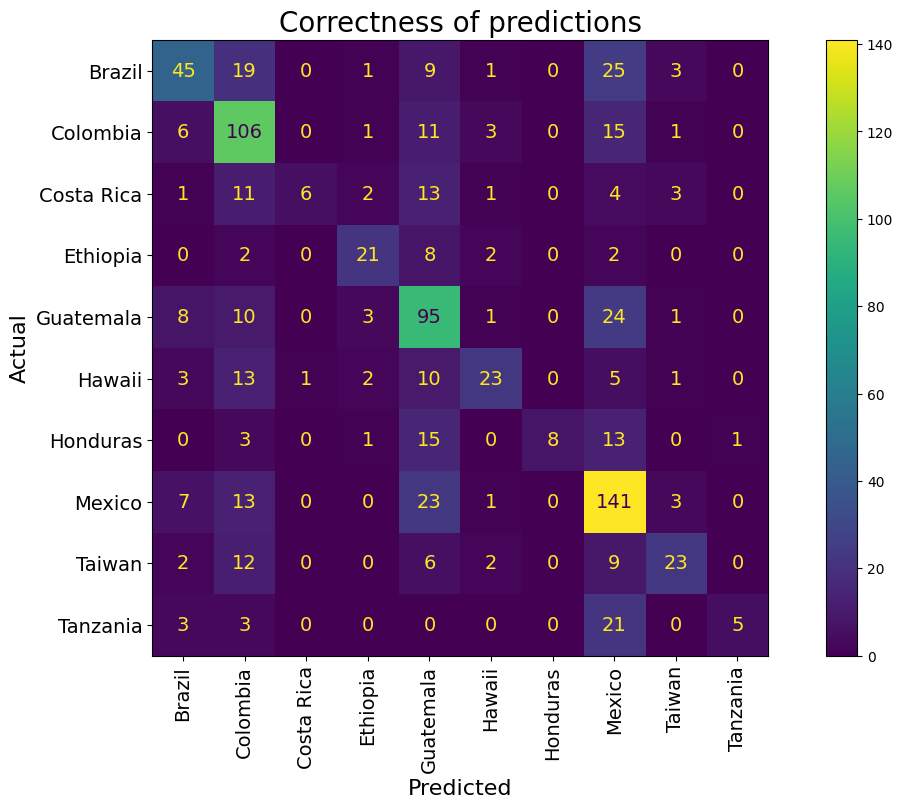

In [79]:
boost_pred = best_grad.predict(X_train)

get_score_and_cm(best_grad, X_train, y_train)

Test data

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Brazil       0.20      0.15      0.17        26
    Colombia       0.45      0.69      0.54        36
  Costa Rica       0.00      0.00      0.00        10
    Ethiopia       0.57      0.44      0.50         9
   Guatemala       0.47      0.51      0.49        35
      Hawaii       0.43      0.20      0.27        15
    Honduras       1.00      0.10      0.18        10
      Mexico       0.47      0.72      0.57        47
      Taiwan       0.14      0.07      0.10        14
    Tanzania       0.00      0.00      0.00         8

    accuracy                           0.43       210
   macro avg       0.37      0.29      0.28       210
weighted avg       0.40      0.43      0.38       210



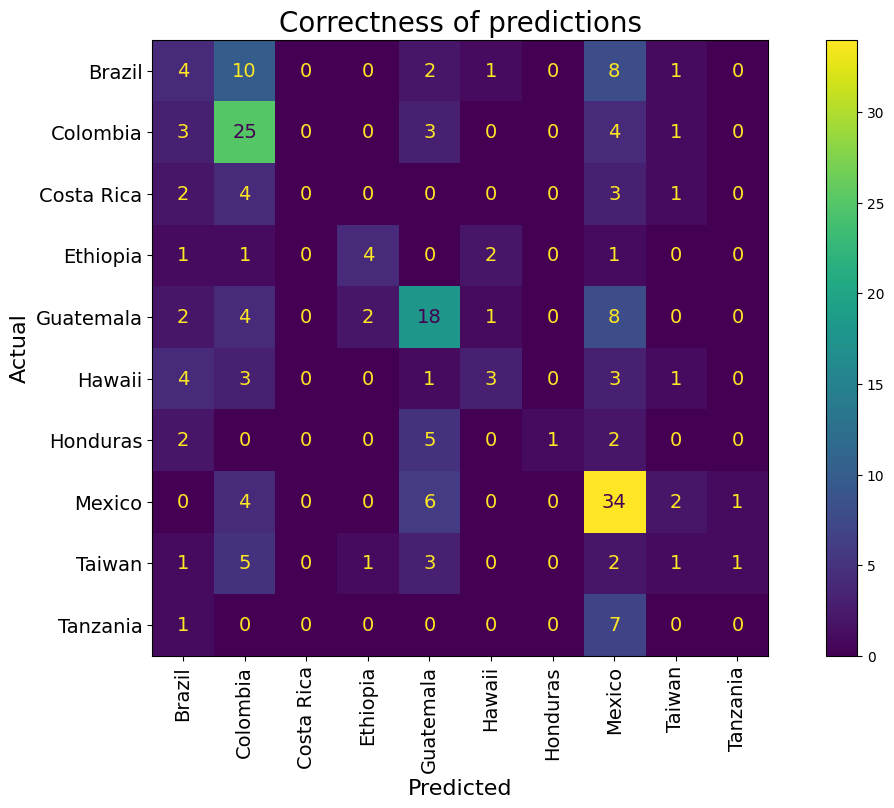

In [80]:
boost_pred = best_grad.predict(X_test)

get_score_and_cm(best_grad, X_test, y_test)

Well, I did not manage to avoid retraining, one of the classes (Costa Rica) was not predicted in the test data at all, but at the same time the weighted avg f1-score is the largest compared to 25-30% before. I will consider this a mini-success, and at the same time a hater of Costa Rica.

# Conclusion

In this work, I tried to classify the origin of coffee beans. I found the data. Conducted data cleaning, feature selection and created several models. Unfortunately, none of them gave the desired result. Most of them were retrained, despite me not doing. I think that in order for the models to work, more data is needed.